In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import statsmodels
import scipy.stats as stats
import statsmodels.formula.api as smf

In [198]:
# show all cols in dataframe
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [199]:
df_responses = pd.read_csv("zwaan_replication_combined.csv")
# df_responses

In [200]:
df_responses

,rt,stimulus,response,trial_type,trial_index,time_elapsed,internal_node_id,subject,survey_code,list,success,timeout,failed_images,failed_audio,failed_video,task,trialIndex,trialType,isMatch,correct_response,hit
0,9726,"<p style=""font-size: 30px;""><b>Welcome to the ...",,html-keyboard-response,0,9728,0.0-0.0,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36489,"<p align=""left""><b><i>Who is conducting the st...",,html-keyboard-response,1,46219,0.0-1.0,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11912,"<p style=""font-size: 30px;""><b>Instructions!</...",,html-keyboard-response,2,58133,0.0-2.0,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,preload,3,59746,0.0-3.0,0zhjr0hs,0zhjr0hs,list_2,true,false,[],[],[],NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"<div style=""font-size:60px;"">+</div>",NaN,html-keyboard-response,4,60260,0.0-4.0-0.0,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,fixation,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49404,841,"<img src=""Images/taperoll.jpg""/>",y,html-keyboard-response,360,589685,0.0-4.0-2.118,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,response,41,experimental,n,y,true
49405,NaN,"<div style=""font-size:60px;"">+</div>",NaN,html-keyboard-response,361,590186,0.0-4.0-0.119,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,fixation,NaN,NaN,NaN,NaN,NaN
49406,696,"<div style=""font-size: 30px;"">There was a blan...",,html-keyboard-response,362,590882,0.0-4.0-1.119,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,cue,111,filler,NaN,NaN,NaN
49407,1358,"<img src=""Images/pan.jpg""/>",n,html-keyboard-response,363,592492,0.0-4.0-2.119,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,response,111,filler,NaN,n,true


# Immediate Verification Task: Data structure cleaning

<span style="font-size: 20px;">1) Remove non-trial and fixation rows</span>  
<span style="font-size: 20px;">2) Remove unnecessary columns</span>  
<span style="font-size: 20px;">3) Reshape the dataframe</span>  
<span style="font-size: 20px;">4) Rename variables</span>  

In [201]:
# remove fixation and non-trial rows (rows where 'task' is empty, 'fixation', or 'task')
df_responses = df_responses[~df_responses['task'].isin(['', 'fixation', 'task']) & df_responses['task'].notna()]

In [202]:
df_responses

,rt,stimulus,response,trial_type,trial_index,time_elapsed,internal_node_id,subject,survey_code,list,success,timeout,failed_images,failed_audio,failed_video,task,trialIndex,trialType,isMatch,correct_response,hit
5,1327,"<div style=""font-size: 30px;"">There was a deck...",,html-keyboard-response,5,61589,0.0-4.0-1.0,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,cue,104,filler,NaN,NaN,NaN
6,769,"<img src=""Images/church.jpg""/>",n,html-keyboard-response,6,62626,0.0-4.0-2.0,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,response,104,filler,NaN,n,true
8,1018,"<div style=""font-size: 30px;"">There was paint ...",,html-keyboard-response,8,64162,0.0-4.0-1.1,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,cue,29,experimental,y,NaN,NaN
9,625,"<img src=""Images/paintstroke.jpg""/>",y,html-keyboard-response,9,65041,0.0-4.0-2.1,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,response,29,experimental,y,y,true
11,844,"<div style=""font-size: 30px;"">There was chicke...",,html-keyboard-response,11,66392,0.0-4.0-1.2,0zhjr0hs,0zhjr0hs,list_2,NaN,NaN,NaN,NaN,NaN,cue,57,experimental,y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49401,837,"<img src=""Images/onionslice.jpg""/>",y,html-keyboard-response,357,587595,0.0-4.0-2.117,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,response,53,experimental,y,y,true
49403,495,"<div style=""font-size: 30px;"">There was tape o...",,html-keyboard-response,359,588592,0.0-4.0-1.118,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,cue,41,experimental,n,NaN,NaN
49404,841,"<img src=""Images/taperoll.jpg""/>",y,html-keyboard-response,360,589685,0.0-4.0-2.118,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,response,41,experimental,n,y,true
49406,696,"<div style=""font-size: 30px;"">There was a blan...",,html-keyboard-response,362,590882,0.0-4.0-1.119,6mk47byq,6mk47byq,list_2,NaN,NaN,NaN,NaN,NaN,cue,111,filler,NaN,NaN,NaN


In [203]:
# confirm that each participant saw 120 trials (240 rows: 120 pictures, 120 images): row number / 240
length_df_responses = df_responses[df_responses.columns[0]].count()
trial_number_participant = length_df_responses / 240
trial_number_participant

135.0

# Verification task N = 135

<span style="font-size: 20px;">I had the prolific study open for 132 people, but some of them only finished the first (verification) part which did not reset the number of the open spots on prolific and that's why we ended up with 135 participants.</span>


In [204]:
# remove unnecessary columns
df_responses = df_responses.drop(columns=['trial_type', 'internal_node_id', 'survey_code', 'success',
                                          'timeout', 'failed_images', 'failed_audio', 'failed_video'])

In [205]:
#create separate dataframes for sentences and images
df_responses_sent = df_responses[df_responses['task'].str.contains('response')==False]
df_responses_img = df_responses[df_responses['task'].str.contains('response')==True]

In [206]:
df_responses_sent = df_responses_sent.drop(columns=['response', 'task', 'correct_response', 'hit', 'time_elapsed'])

In [207]:
# rename columns
df_responses_sent = df_responses_sent.rename(columns={"rt": "rt_sent", "list": "list_sent",
                                                      "trialType": "trialTypeSent",
                                                      "isMatch": "isMatchSent"})
df_responses_img = df_responses_img.rename(columns={"rt": "rt_img", "trialIndex": "trialIndexImg",
                                                    "stimulus": "cue"})

In [208]:
# merge sentence and image dataframes

df_responses_img = df_responses_img.reset_index()
df_responses_sent = df_responses_sent.reset_index()

df_responses_img = df_responses_img.drop(columns=['index'])
df_responses_sent = df_responses_sent.drop(columns=['index'])

df = pd.concat([df_responses_img, df_responses_sent], axis=1)

In [209]:
# drop duplicate columns and rename the rest
df_final = df.loc[:,~df.columns.duplicated()]

df_final = df_final.drop(columns=['task', 'trialIndexImg', 'list_sent', 'trialTypeSent', 'isMatchSent'])

df_final = df_final.rename(columns={"cue": "image", "stimulus": "sentence"})

df_final = df_final[['subject', 'trial_index', 'trialIndex', 'sentence', 'image', 'trialType',
                     'isMatch', 'rt_sent', 'rt_img', 'hit', 'list', 'time_elapsed',
                     'correct_response', 'response']]

In [210]:
# confirm that participant number has not changed
df_final

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response
0,0zhjr0hs,6,104,"<div style=""font-size: 30px;"">There was a deck...","<img src=""Images/church.jpg""/>",filler,NaN,1327,769,true,list_2,62626,n,n
1,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,y,1018,625,true,list_2,65041,y,y
2,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,y,844,782,true,list_2,67436,y,y
3,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,n,754,690,true,list_2,69640,y,y
4,0zhjr0hs,18,67,"<div style=""font-size: 30px;"">There was a hill...","<img src=""Images/scissors.jpg""/>",filler,NaN,484,508,true,list_2,71397,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,6mk47byq,351,65,"<div style=""font-size: 30px;"">There was a doll...","<img src=""Images/crate.jpg""/>",filler,NaN,451,1046,true,list_2,582839,n,n
16196,6mk47byq,354,48,"<div style=""font-size: 30px;"">There was ketchu...","<img src=""Images/ketchupbottle.jpg""/>",experimental,y,1192,780,true,list_2,585565,y,y
16197,6mk47byq,357,53,"<div style=""font-size: 30px;"">There was onion ...","<img src=""Images/onionslice.jpg""/>",experimental,y,440,837,true,list_2,587595,y,y
16198,6mk47byq,360,41,"<div style=""font-size: 30px;"">There was tape o...","<img src=""Images/taperoll.jpg""/>",experimental,n,495,841,true,list_2,589685,y,y


In [211]:
# save preprocessed dataset
df_final.to_csv('zv_task_questionnaire_replication_cleaned.csv', index=False)

In [212]:
df_task = pd.read_csv('zv_task_questionnaire_replication_cleaned.csv')
df_questionnaire = pd.read_csv('zwaan_replication_n132_0410_questionnaires_raw.csv')

# Questionnaires: Data structure cleaning

<span style="font-size: 20px;">1) Remove unnecessary columns and rows</span>  
<span style="font-size: 20px;">2) Rename variables</span>  

In [213]:
# # remove unnecessary columns
# df_questionnaire = df_questionnaire.drop(columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
#                                          'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
#                                          'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
#                                          'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
#                                          'UserLanguage', 'random ID', 'random', 'previousParticipatio'])

df_questionnaire = df_questionnaire.drop(columns=['StartDate', 'EndDate','RecordedDate'])

In [214]:
# rename columns
df_questionnaire = df_questionnaire.rename(columns={"Duration (in seconds)": "duration_quest", "Q258": "subject",
                                                    "welcome": "prolific_id", "phenomenology_6_TEXT": "phenomenology_other",
                                                    "gender_5_TEXT": "gender_other", "immigrationStatus": "neurodivergent",
                                                    "vision_3_TEXT": "vision_other", "strategy-cat": "strategy_cat",
                                                    "strategy_open": "strategy_open", "feedback-task": "feedback_task",
                                                    "previousParticipatio": "previous_participation"})
# drop unnecessary rows
df_questionnaire = df_questionnaire[df_questionnaire['duration_quest'].str.contains('Duration')==False]
df_questionnaire = df_questionnaire[df_questionnaire['duration_quest'].str.contains('ImportId')==False]

In [215]:
# recent index
df_questionnaire = df_questionnaire.reset_index()
df_questionnaire = df_questionnaire.drop(columns=['index'])

In [216]:
# check N of ppts in questionnaires
df_questionnaire

,duration_quest,subject,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general
0,627,0zhjr0hs,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
1,601,hx8ph3ed,6393cc165ee481b84a567427,4,4,4,4,3,4,4,3,5,3,3,4,2,4,4,4,3,4,4,1,3,2,2,4,2,4,4,3,2,4,3,4,5,3,4,4,4,5,4,4,4,3,4,2,3,3,4,3,2,4,2,2,3,2,3,4,4,1,3,3,3,3,2,3,3,4,4,4,3,4,4,3,4,4,3,4,4,4,2,3,4,4,2,2,3,2,1,4,1,3,3,3,4,2,4,5,5,3,3,2,1,1,NaN,2,26,2,NaN,1,4,1,NaN,1,4,"About how we interpret words, images and the w...",1,NaN,NaN
2,568,rxeup7ff,62e296cf7c53da981b7f32c0,4,2,4,3,4,4,5,3,2,4,4,4,2,2,4,3,2,4,1,3,2,4,4,3,3,3,3,3,3,2,3,2,4,3,3,3,3,5,3,2,3,3,4,3,4,3,4,3,3,4,4,2,2,3,2,4,2,4,2,4,2,3,3,4,3,3,4,4,4,3,4,3,3,4,4,2,4,4,3,3,5,2,3,2,4,3,3,2,2,4,3,4,3,3,2,3,4,4,2,4,1,1,NaN,2,28,2,NaN,1,2,1,NaN,1,2,Remembering through visual images or writting.,1,NaN,More images
3,976,cxxat1fj,65c251924cbab2f4b132bc7d,4,4,2,2,2,5,5,1,3,1,5,4,2,4,2,3,2,4,1,3,4,2,4,5,2,2,4,4,3,2,2,4,4,5,4,3,2,5,3,2,4,3,1,4,5,3,4,2,3,2,3,2,2,2,2,3,3,2,4,2,3,3,3,5,5,4,3,4,5,5,4,5,2,2,1,2,4,3,1,1,5,2,2,1,5,2,2,4,2,4,2,5,4,3,4,4,4,3,3,3,1,6,I think of it more like abstract concepts - im...,2,25,1,NaN,1,4,1,NaN,1,4,Something about studying visual learners and v...,2,Saying the words out loud,NaN
4,1134,kddy6crg,65ab080f996c80725dda3852,4,2,1,2,1,2,2,2,1,2,2,4,4,2,1,3,1,4,1,1,4,2,1,5,2,1,4,2,2,5,1,2,2,2,4,4,1,5,4,2,2,2,1,4,2,2,4,3,2,2,4,2,3,3,4,3,2,3,3,4,2,4,2,4,2,4,4,4,4,4,5,4,4,4,5,5,4,2,2,2,4,2,4,1,2,2,1,2,2,1,1,4,4,5,2,4,4,4,4,5,1,1,NaN,2,48,2,NaN,1,4,1,NaN,1,2,I think the study was about memory or creative...,1,Yes was my answer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1146,5xt1rwdh,5ac0fd805cd1050001620d02,2,1,5,2,5,1,2,1,2,3,1,1,1,1,2,2,1,1,1,5,1,

# Questionnaire N = 133

<span style="font-size: 20px;">Probably for the same reasons as described above for the behavioral task.</span>


# Preprocessing
<span style="font-size: 20px;">1) Remove subjects who did not complete the questionnaires</span>  
<span style="font-size: 20px;">2) Remove subjectrs who self-reported as non-native English-speakers</span>  
<span style="font-size: 20px;">3) Remove subjects who participated more than once</span>  
<span style="font-size: 20px;">4) Remove subjects who failed more than one attention check</span>  
<span style="font-size: 20px;">5) Remove trials whose RT falls 3 or moroe standard deviations above the mean RT for a given subject</span>  
<span style="font-size: 20px;">6) Remove trials with an RT of 300ms or lower for either a sentence or a picture recognition</span>

In [217]:
# merge questionnaires and verification task data by subject
# df_task_questionnaire = pd.merge(df_final,df_questionnaire, how='outer', on = 'subject', suffixes = ('_left', '_right'))
df_task_questionnaire = pd.merge(df_final, df_questionnaire, how='inner', on='subject', suffixes=('_left', '_right'))

In [218]:
# check number of participants left after removing those who did not complete questionnaire part
df_task_questionnaire

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general
0,0zhjr0hs,6,104,"<div style=""font-size: 30px;"">There was a deck...","<img src=""Images/church.jpg""/>",filler,NaN,1327,769,true,list_2,62626,n,n,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
1,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,y,1018,625,true,list_2,65041,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
2,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,y,844,782,true,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
3,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,n,754,690,true,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
4,0zhjr0hs,18,67,"<div style=""font-size: 30px;"">There was a hill...","<img src=""Images/scissors.jpg""/>",filler,NaN,484,508,true,list_2,71397,n,n,

In [219]:
df_task_questionnaire

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general
0,0zhjr0hs,6,104,"<div style=""font-size: 30px;"">There was a deck...","<img src=""Images/church.jpg""/>",filler,NaN,1327,769,true,list_2,62626,n,n,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
1,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,y,1018,625,true,list_2,65041,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
2,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,y,844,782,true,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
3,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,n,754,690,true,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5,4,5,2,1,5,1,5,4,3,4,5,2,2,2,1,3,4,4,2,3,1,1,1,1,3,3,2,2,1,1,1,1,2,2,2,2,3,4,2,5,2,5,4,5,5,5,5,5,5,5,5,5,5,4,5,5,4,4,5,5,5,3,5,5,5,4,1,5,1,1,2,NaN,2,21,1,NaN,1,4,1,NaN,1,2,"Different ways individuals think, whether in w...",2,"Taking a mental ""picture"" of the objects in th...",NaN
4,0zhjr0hs,18,67,"<div style=""font-size: 30px;"">There was a hill...","<img src=""Images/scissors.jpg""/>",filler,NaN,484,508,true,list_2,71397,n,n,

In [220]:
# drop filler trials
df_task_questionnaire = df_task_questionnaire[df_task_questionnaire['trialType'].str.contains('filler')==False]

In [221]:
df_task_questionnaire = df_task_questionnaire.replace(['1', '2', '3', '4', '5'], [1,2,3,4,5])

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/1243569080.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_task_questionnaire = df_task_questionnaire.replace(['1', '2', '3', '4', '5'], [1,2,3,4,5])


In [222]:
# Remove participants who failed attention checks

# Remove participants who failed at least one attention check
df_task_questionnaire['failed_checks'] = (
    (df_task_questionnaire['osivq-catch-1'] != 1).astype(int) +
    (df_task_questionnaire['irq-catch-1'] != 1).astype(int) +
    (df_task_questionnaire['osivq-catch-2'] != 5).astype(int)
)

# # less stringent attention check removal: Remove if they fail 2 out of 3 checks
# df_task_questionnaire['failed_checks'] = (
#     (df_task_questionnaire['osivq-catch-1'] != 1).astype(int) +
#     (df_task_questionnaire['irq-catch-1'] != 1).astype(int) +
#     (df_task_questionnaire['osivq-catch-2'] != 5).astype(int)
# )

# # Keep only participants who failed 1 or 0 checks (meaning they passed at least 2 out of 3 checks)
# df_task_questionnaire_filtered = df_task_questionnaire[df_task_questionnaire['failed_checks'] == 1]

df_task_questionnaire_filtered = df_task_questionnaire[df_task_questionnaire['failed_checks'] == 0]

# Drop the 'failed_checks' column
df_task_questionnaire_filtered = df_task_questionnaire_filtered.drop(columns=['failed_checks'])


In [223]:
df_task_questionnaire_filtered

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general
1,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,y,1018,625,true,list_2,65041,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN
2,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,y,844,782,true,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN
3,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,n,754,690,true,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN
7,0zhjr0hs,27,48,"<div style=""font-size: 30px;"">There was ketchu...","<img src=""Images/ketchupbottle.jpg""/>",experimental,y,387,530,true,list_2,76587,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,

In [224]:
df_task_questionnaire = df_task_questionnaire_filtered

In [225]:
# remove participants who are not native English-speakers
df_task_questionnaire = df_task_questionnaire[df_task_questionnaire['native-language'] == 1]

In [226]:
df_task_questionnaire

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general
1,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,y,1018,625,true,list_2,65041,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN
2,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,y,844,782,true,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN
3,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,n,754,690,true,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN
7,0zhjr0hs,27,48,"<div style=""font-size: 30px;"">There was ketchu...","<img src=""Images/ketchupbottle.jpg""/>",experimental,y,387,530,true,list_2,76587,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,

In [227]:
# remove participants who have participated previously
df_task_questionnaire = df_task_questionnaire[df_task_questionnaire['previous_participation'] == 2]

In [228]:
# # check how many participants were excluded
# df_task_questionnaire

In [230]:
# exclude individual trials
# Step 1: Calculate mean and standard deviation for 'rt_sent' and 'rt_img' for each subject on critical trials.

# Convert rt_sent and rt_img to numeric (force errors to NaN just in case)
df_task_questionnaire['rt_sent'] = pd.to_numeric(df_task_questionnaire['rt_sent'], errors='coerce')
df_task_questionnaire['rt_img'] = pd.to_numeric(df_task_questionnaire['rt_img'], errors='coerce')

# Calculate mean and std dev for rt_sent and rt_img within each subject
grouped_stats = df_task_questionnaire.groupby('subject').agg({
    'rt_sent': ['mean', 'std'],
    'rt_img': ['mean', 'std']
}).reset_index()

# The resulting DataFrame has a MultiIndex for the columns, so flatten this and set more friendly names
grouped_stats.columns = ['_'.join(col).rstrip('_') for col in grouped_stats.columns.values]

# Reset index to make 'subject' a column again for merging
grouped_stats.reset_index(inplace=True)

grouped_stats

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/1351515384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task_questionnaire['rt_sent'] = pd.to_numeric(df_task_questionnaire['rt_sent'], errors='coerce')
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/1351515384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task_questionnaire['rt_img'] = pd.to_numeric(df_task_questionnaire['rt_img'], errors='coerce')


,index,subject,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std
0,0,09g1jpab,1322.533333,2671.126776,1373.750000,580.260538
1,1,0a1mu6ef,1092.750000,1929.418896,603.383333,170.725976
2,2,0q5f5cfx,891.316667,816.184727,696.750000,325.190876
3,3,0zhjr0hs,378.850000,178.536501,595.766667,233.353690
4,4,1ggpsz6b,536.816667,295.964983,641.250000,147.349535
...,...,...,...,...,...,...
110,110,zlnw3q3w,1655.566667,1103.794708,3568.650000,3205.366595
111,111,zplbf8cc,802.500000,364.694741,762.700000,409.894335
112,112,zqxespyp,2132.850000,2419.879384,3369.483333,10455.863836
113,113,zqymv7ph,2688.766667,12950.390757,1330.166667,495.239547


In [231]:
# Merge the stats back into the original DataFrame
df_task_questionnaire = pd.merge(df_task_questionnaire, grouped_stats, on='subject', how='left')

In [232]:
# Drop rows where 'rt_img' is 3 or more standard deviations above their respective means
df_filtered = df_task_questionnaire[
     ((df_task_questionnaire['rt_img'] <= df_task_questionnaire['rt_img_mean'] + 3*df_task_questionnaire['rt_img_std']) |
     df_task_questionnaire['rt_img'].isnull())
]

In [233]:
# Further drop rows with wither 'rt_sent' or 'rt_img' of 300 or lower
df_filtered = df_filtered[
    (df_filtered['rt_sent'] > 300) & (df_filtered['rt_img'] > 300)
]

In [234]:
df_task_questionnaire = df_filtered

In [235]:
# Check how many trials were left per participant

subject_counts = df_task_questionnaire['subject'].value_counts()

# Step 2: Identify subjects with fewer than 30 trials
subjects_to_exclude = subject_counts[subject_counts < 30].index

# Step 3: Filter out those subjects from the DataFrame
df_task_questionnaire_filtered_ppts = df_task_questionnaire[~df_task_questionnaire['subject'].isin(subjects_to_exclude)]

# Confirm it worked
print(f"Original n = {len(df_task_questionnaire)}")
print(f"Filtered n = {len(df_task_questionnaire_filtered_ppts)}")
print(f"Excluded {len(subjects_to_exclude)} subjects with <30 trials")

Original n = 6285
Filtered n = 6205
Excluded 4 subjects with <30 trials


In [236]:
# Count number of unique subjects after filtering
final_subject_count = df_task_questionnaire_filtered_ppts['subject'].nunique()
initial_subject_count = df_task_questionnaire['subject'].nunique()
print(f"Initial number of subjects: {initial_subject_count}")
print(f"Final number of subjects: {final_subject_count}")

Initial number of subjects: 115
Final number of subjects: 111


In [237]:
# Count remaining trials per subject
subject_trial_counts = df_task_questionnaire_filtered_ppts['subject'].value_counts().sort_index()

# Print the result
print(subject_trial_counts)

subject
09g1jpab    58
0a1mu6ef    58
0q5f5cfx    56
0zhjr0hs    38
1ggpsz6b    55
            ..
zg96qrwn    46
zlnw3q3w    58
zplbf8cc    58
zqxespyp    59
zqymv7ph    57
Name: count, Length: 111, dtype: int64


In [238]:
df_task_questionnaire = df_task_questionnaire_filtered_ppts

In [239]:
# Step 1: Normalize string booleans (in case they're 'true'/'false' as strings)
df_task_questionnaire['hit'] = df_task_questionnaire['hit'].str.lower().map({'true': True, 'false': False})

# Step 2: Convert to integers (True → 1, False → 0)
df_task_questionnaire['hit'] = df_task_questionnaire['hit'].astype(int)

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/3028428538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task_questionnaire['hit'] = df_task_questionnaire['hit'].str.lower().map({'true': True, 'false': False})
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/3028428538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task_questionnaire['hit'] = df_task_questionnaire['hit'].astype(int)


In [146]:
# # Remove subjects whose mean accuracy is < 50%

# avg_hit_rate = df_task_questionnaire.groupby('subject')['hit'].mean()
# avg_hit_rate
# subjects_to_keep = avg_hit_rate[avg_hit_rate >= 0.5].index
# df_task_questionnaire_filtered = df_task_questionnaire[df_task_questionnaire['subject'].isin(subjects_to_keep)]

In [147]:
# n_removed = df_task_questionnaire['subject'].nunique() - df_task_questionnaire_filtered['subject'].nunique()
# print(f"Removed {n_removed} subjects with <50% average hit rate.")

In [240]:
df_task_questionnaire

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general,index,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std
0,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,y,1018,625,1,list_2,65041,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
1,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,y,844,782,1,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
2,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,n,754,690,1,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
3,0zhjr0hs,27,48,"<div style=""font-size:


# Post-preprocessing N = 119, Ntrials = 6623

<span style="font-size: 20px;">1) N did not complete questionnaires</span>  
<span style="font-size: 20px;">2) N failed attention checks</span>  
<span style="font-size: 20px;">4) N had participated before</span>  
<span style="font-size: 20px;">5) N outlier trials removed</span>  
<span style="font-size: 20px;">6) More than 50% of outlier trials were removed for 5 participants</span><br>
<span style="font-size: 20px;">7) Removed 3 participants with accuracy < 50%</span>

In [149]:
### Calculate averages and z score questionnaires
df_task_questionnaire = df_task_questionnaire.copy()

# irq averages
df_task_questionnaire['irq_visual_mean'] = df_task_questionnaire.filter(regex='irq-visual').mean(axis=1)
df_task_questionnaire['irq_verbal_mean'] = df_task_questionnaire.filter(regex='irq-verbal').mean(axis=1)
df_task_questionnaire['irq_ortho_mean'] = df_task_questionnaire.filter(regex='irq-ortho').mean(axis=1)
df_task_questionnaire['irq_manipulation_mean'] = df_task_questionnaire.filter(regex='irq-manipulation').mean(axis=1)

# osviq averages
df_task_questionnaire['osviq_spatial_mean'] = df_task_questionnaire.filter(regex='osviq-spatial').mean(axis=1)
df_task_questionnaire['osviq_object_mean'] = df_task_questionnaire.filter(regex='osviq-object').mean(axis=1)
df_task_questionnaire['osviq_verbal_mean'] = df_task_questionnaire.filter(regex='osviq-verbal').mean(axis=1)

#vviq sum
df_task_questionnaire['vviq_sum'] = df_task_questionnaire.filter(regex='vviq').sum(axis=1)

def z_score_standardization(series):
    return (series - series.mean()) / series.std()

for col in df_task_questionnaire.columns:
    df_task_questionnaire['vviq_z'] = z_score_standardization(df_task_questionnaire['vviq_sum'])
    df_task_questionnaire['irq_visual_z'] = z_score_standardization(df_task_questionnaire['irq_visual_mean'])
    df_task_questionnaire['irq_verbal_z'] = z_score_standardization(df_task_questionnaire['irq_verbal_mean'])
    df_task_questionnaire['irq_ortho_z'] = z_score_standardization(df_task_questionnaire['irq_ortho_mean'])
    df_task_questionnaire['irq_manipulation_z'] = z_score_standardization(df_task_questionnaire['irq_manipulation_mean'])
    df_task_questionnaire['osviq_object_z'] = z_score_standardization(df_task_questionnaire['osviq_object_mean'])
    df_task_questionnaire['osviq_spatial_z'] = z_score_standardization(df_task_questionnaire['osviq_spatial_mean'])
    df_task_questionnaire['osviq_verbal_z'] = z_score_standardization(df_task_questionnaire['osviq_verbal_mean'])

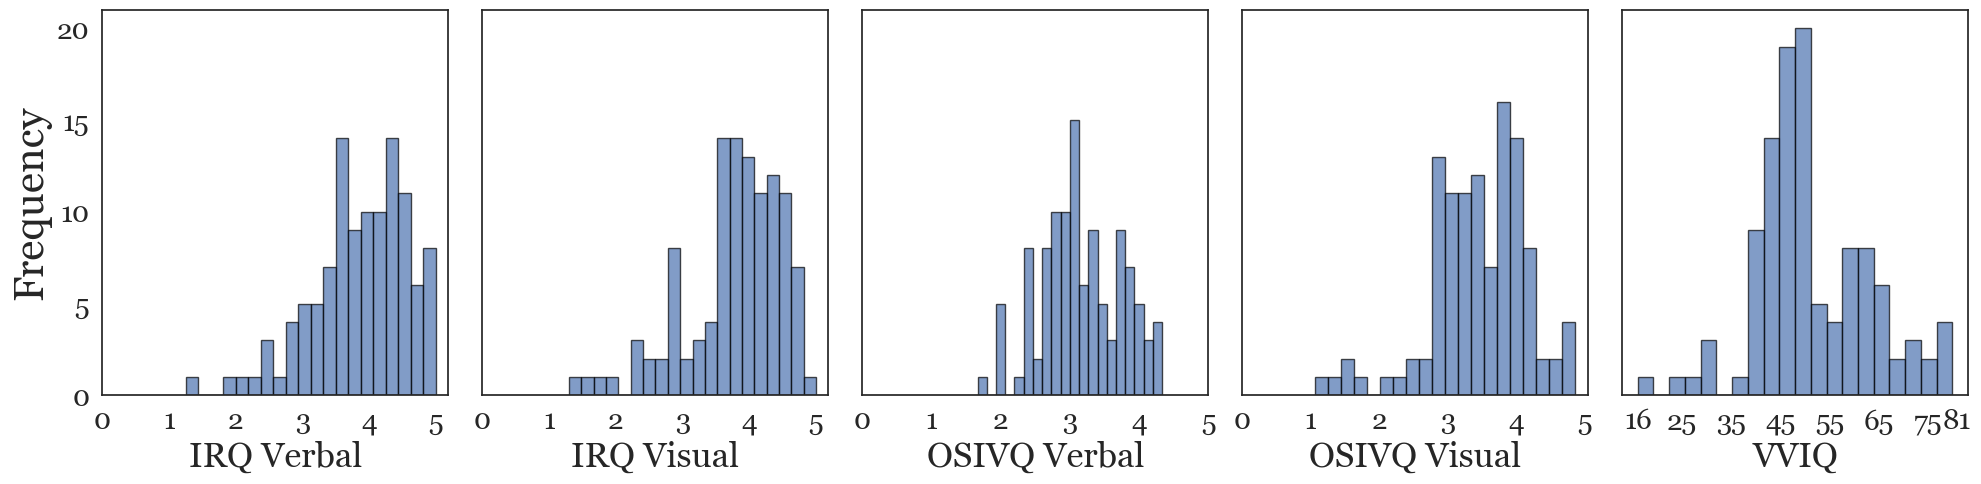

In [150]:
# Calculate the mean for each variable for each subject
mean_vviq_per_subject = df_task_questionnaire.groupby('subject')['vviq_sum'].mean().reset_index()
mean_irq_verbal_per_subject = df_task_questionnaire.groupby('subject')['irq_verbal_mean'].mean().reset_index()
mean_irq_visual_per_subject = df_task_questionnaire.groupby('subject')['irq_visual_mean'].mean().reset_index()
mean_osivq_verbal_per_subject = df_task_questionnaire.groupby('subject')['osviq_verbal_mean'].mean().reset_index()
mean_osivq_visual_per_subject = df_task_questionnaire.groupby('subject')['osviq_object_mean'].mean().reset_index()

# Removing duplicate rows based on 'subject'
df_unique_vviq = df_task_questionnaire.drop_duplicates(subset=['subject'])
df_unique_irq_visual = df_task_questionnaire.drop_duplicates(subset=['subject'])
df_unique_irq_verbal = df_task_questionnaire.drop_duplicates(subset=['subject'])
df_unique_osivq_visual = df_task_questionnaire.drop_duplicates(subset=['subject'])
df_unique_osivq_verbal = df_task_questionnaire.drop_duplicates(subset=['subject'])

# Set up the matplotlib figure for side by side plots
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Histogram for IRQ-Verbal-Mean
axs[0].hist(df_unique_irq_verbal['irq_verbal_mean'], bins=20, edgecolor='black', alpha=0.7)
axs[0].set_title('')
axs[0].set_xlabel('IRQ Verbal', fontsize=25)
axs[0].set_ylabel('Frequency', fontsize=30)
axs[0].set_xticks([0, 1, 2, 3, 4, 5]) 
axs[0].tick_params(axis='both', labelsize=20) 

# Histogram for IRQ-Visual-Mean
axs[1].hist(df_unique_irq_visual['irq_visual_mean'], bins=20, edgecolor='black', alpha=0.7)
axs[1].set_title('')
axs[1].set_xlabel('IRQ Visual', fontsize=25)
axs[1].set_xticks([0, 1, 2, 3, 4, 5]) 
axs[1].tick_params(axis='both', labelsize=20)

# Histogram for OSIVQ-Verbal-Mean
axs[2].hist(df_unique_osivq_verbal['osviq_verbal_mean'], bins=20, edgecolor='black', alpha=0.7)
axs[2].set_title('')
axs[2].set_xlabel('OSIVQ Verbal', fontsize=25)
axs[2].set_xticks([0, 1, 2, 3, 4, 5]) 
axs[2].tick_params(axis='both', labelsize=20)

# Histogram for IRQ-Visual-Mean
axs[3].hist(df_unique_osivq_visual['osviq_object_mean'], bins=20, edgecolor='black', alpha=0.7)
axs[3].set_title('')
axs[3].set_xlabel('OSIVQ Visual', fontsize=25)
axs[3].set_xticks([0, 1, 2, 3, 4, 5]) 
axs[3].tick_params(axis='both', labelsize=20)

# Histogram for VVIQ-Sum
axs[4].hist(df_unique_vviq['vviq_sum'], bins=20, edgecolor='black', alpha=0.7)
axs[4].set_title('')
axs[4].set_xlabel('VVIQ', fontsize=25)
axs[4].set_xticks([16, 25, 35, 45, 55, 65, 75, 81]) 
axs[4].tick_params(axis='both', labelsize=20)

plt.tight_layout()
plt.show()

In [151]:
# Calculate accuracy per subject and isMatch group

proportion_correct = df_task_questionnaire.groupby(['subject', 'isMatch'])['hit'].mean().reset_index(name='proportion_correct')
proportion_correct['percentage_correct'] = proportion_correct['proportion_correct'] * 100
print(proportion_correct)

      subject isMatch  proportion_correct  percentage_correct
0    09g1jpab       n            1.000000          100.000000
1    09g1jpab       y            1.000000          100.000000
2    0a1mu6ef       n            0.931034           93.103448
3    0a1mu6ef       y            0.965517           96.551724
4    0q5f5cfx       n            1.000000          100.000000
..        ...     ...                 ...                 ...
217  zplbf8cc       y            0.965517           96.551724
218  zqxespyp       n            0.466667           46.666667
219  zqxespyp       y            0.413793           41.379310
220  zqymv7ph       n            0.931034           93.103448
221  zqymv7ph       y            1.000000          100.000000

[222 rows x 4 columns]


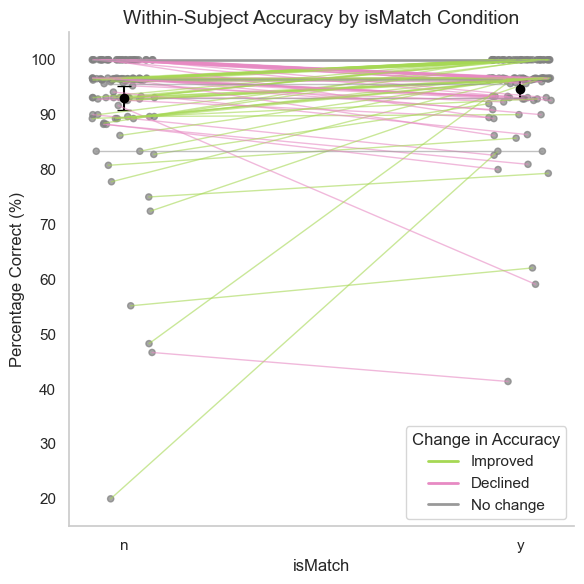

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import t

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

# Custom legend
custom_lines = [
    Line2D([0], [0], color='#A6D854', lw=2, label='Improved'),
    Line2D([0], [0], color='#E78AC3', lw=2, label='Declined'),
    Line2D([0], [0], color='#999999', lw=2, label='No change')
]
plt.legend(handles=custom_lines, title='Change in Accuracy', loc='lower right')

# Compute group means and 95% CIs
summary = proportion_correct.groupby('isMatch')['percentage_correct'].agg(['mean', 'count', 'std']).reset_index()
summary['se'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['se'] * t.ppf(0.975, df=summary['count'] - 1)

# Map x values
x_mapping = {'n': 0, 'y': 1}
summary['x'] = summary['isMatch'].map(x_mapping)

# Plot group mean and CI as dots with error bars
plt.errorbar(
    x=summary['x'],
    y=summary['mean'],
    yerr=summary['ci95'],
    fmt='o',
    color='black',
    capsize=5,
    markersize=6,
    linewidth=1.5
)

plt.grid(False)

# Individual lines + dots
jitter_strength = 0.08
dot_colors = "gray"

for subj in proportion_correct['subject'].unique():
    subj_data = proportion_correct[proportion_correct['subject'] == subj]
    if len(subj_data) == 2:
        subj_data_sorted = subj_data.sort_values('isMatch')
        x_vals_base = [x_mapping[val] for val in subj_data_sorted['isMatch']]
        x_jitter = np.random.uniform(-jitter_strength, jitter_strength, size=2)
        x_vals = [x + j for x, j in zip(x_vals_base, x_jitter)]
        y_vals = subj_data_sorted['percentage_correct'].values

        # Color by direction of change
        delta = y_vals[1] - y_vals[0]
        if delta > 0:
            line_color = '#A6D854'
        elif delta < 0:
            line_color = '#E78AC3'
        else:
            line_color = '#999999'

        plt.plot(x_vals, y_vals, color=line_color, alpha=0.6, linewidth=1)
        plt.scatter(x_vals, y_vals, c=[dot_colors, dot_colors], s=20, alpha=0.7)

# Final plot tweaks
plt.title('Within-Subject Accuracy by isMatch Condition', fontsize=14)
plt.ylabel('Percentage Correct (%)', fontsize=12)
plt.xlabel('isMatch', fontsize=12)
plt.xticks([0, 1], ['n', 'y'])
plt.ylim(15, 105)
sns.despine()
plt.tight_layout()
plt.show()

In [153]:
# Initialize a list to collect change types
change_types = []

# Loop through each subject and determine accuracy change direction
for subj in proportion_correct['subject'].unique():
    subj_data = proportion_correct[proportion_correct['subject'] == subj]
    if len(subj_data) == 2:
        subj_data_sorted = subj_data.sort_values('isMatch')
        y_acc = subj_data_sorted.loc[subj_data_sorted['isMatch'] == 'y', 'percentage_correct'].values[0]
        n_acc = subj_data_sorted.loc[subj_data_sorted['isMatch'] == 'n', 'percentage_correct'].values[0]

        delta = y_acc - n_acc
        if delta > 0:
            change_types.append('Improved')
        elif delta < 0:
            change_types.append('Declined')
        else:
            change_types.append('No change')

# Create summary dataframe
import pandas as pd
change_summary_acc = pd.DataFrame({'change_type': change_types})
summary_counts_acc = change_summary_acc['change_type'].value_counts().reset_index()
summary_counts_acc.columns = ['change_type', 'count']

# Display the summary table
print(summary_counts_acc)


  change_type  count
0    Improved     53
1    Declined     41
2   No change     17


In [154]:
# # Create a subset with only correct trials for RT
# df_correct = df_task_questionnaire[df_task_questionnaire['hit'] == 1].copy()

In [155]:
# Group by 'subject' and 'isMatch', then calculate the mean of the 'rt_img' column
mean_rt_img = df_task_questionnaire.groupby(['subject', 'isMatch'])['rt_img'].mean().reset_index(name='mean_rt_img')

# Display the result
print(mean_rt_img)

      subject isMatch  mean_rt_img
0    09g1jpab       n  1350.750000
1    09g1jpab       y  1334.866667
2    0a1mu6ef       n   573.413793
3    0a1mu6ef       y   591.172414
4    0q5f5cfx       n   641.714286
..        ...     ...          ...
217  zplbf8cc       y   714.000000
218  zqxespyp       n  2439.600000
219  zqxespyp       y  1638.103448
220  zqymv7ph       n  1288.482759
221  zqymv7ph       y  1200.321429

[222 rows x 3 columns]


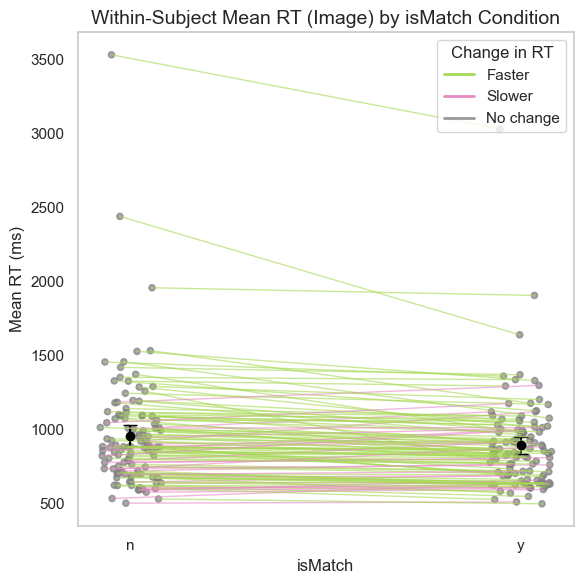

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import t

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Create custom legend
custom_lines = [
    Line2D([0], [0], color='#A6D854', lw=2, label='Faster'),
    Line2D([0], [0], color='#E78AC3', lw=2, label='Slower'),
    Line2D([0], [0], color='#999999', lw=2, label='No change')
]
plt.legend(handles=custom_lines, title='Change in RT', loc='upper right')

# Compute group summary stats
summary = mean_rt_img.groupby('isMatch')['mean_rt_img'].agg(['mean', 'count', 'std']).reset_index()
summary['se'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['se'] * t.ppf(0.975, df=summary['count'] - 1)

# Map isMatch to x
x_mapping = {'n': 0, 'y': 1}
summary['x'] = summary['isMatch'].map(x_mapping)

# Plot group means with CI
plt.errorbar(
    x=summary['x'],
    y=summary['mean'],
    yerr=summary['ci95'],
    fmt='o',
    color='black',
    capsize=5,
    markersize=6,
    linewidth=1.5
)

plt.grid(False)

# Plot individual subjects
jitter_strength = 0.08
dot_colors = 'gray'

for subj in mean_rt_img['subject'].unique():
    subj_data = mean_rt_img[mean_rt_img['subject'] == subj]
    if len(subj_data) == 2:
        subj_data_sorted = subj_data.sort_values('isMatch')
        x_vals_base = [x_mapping[val] for val in subj_data_sorted['isMatch']]
        x_jitter = np.random.uniform(-jitter_strength, jitter_strength, size=2)
        x_vals = [x + j for x, j in zip(x_vals_base, x_jitter)]
        y_vals = subj_data_sorted['mean_rt_img'].values

        # RT change: faster = y < n
        delta = y_vals[1] - y_vals[0]
        if delta < 0:
            line_color = '#A6D854'  # Faster
        elif delta > 0:
            line_color = '#E78AC3'  # Slower
        else:
            line_color = '#999999'  # No change

        plt.plot(x_vals, y_vals, color=line_color, alpha=0.6, linewidth=1)
        plt.scatter(x_vals, y_vals, c=[dot_colors, dot_colors], s=20, alpha=0.7)

# Final formatting
plt.title('Within-Subject Mean RT (Image) by isMatch Condition', fontsize=14)
plt.ylabel('Mean RT (ms)', fontsize=12)
plt.xlabel('isMatch', fontsize=12)
plt.xticks([0, 1], ['n', 'y'])
# plt.ylim(400, 1600)
sns.despine
plt.tight_layout()
plt.show()


In [157]:
# Initialize a list to collect change type for each subject
change_types = []

# Loop through each subject
for subj in mean_rt_img['subject'].unique():
    subj_data = mean_rt_img[mean_rt_img['subject'] == subj]
    
    if len(subj_data) == 2:
        subj_data_sorted = subj_data.sort_values('isMatch')
        y_rt = subj_data_sorted.loc[subj_data_sorted['isMatch'] == 'y', 'mean_rt_img'].values[0]
        n_rt = subj_data_sorted.loc[subj_data_sorted['isMatch'] == 'n', 'mean_rt_img'].values[0]
        
        delta = y_rt - n_rt
        if delta < 0:
            change_types.append('Faster')
        elif delta > 0:
            change_types.append('Slower')
        else:
            change_types.append('No change')

# Convert to DataFrame for summary
import pandas as pd
change_summary = pd.DataFrame({'change_type': change_types})
summary_counts = change_summary['change_type'].value_counts().reset_index()
summary_counts.columns = ['change_type', 'count']

# Display the summary table
print(summary_counts)


  change_type  count
0      Faster     84
1      Slower     27


/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/1694002306.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


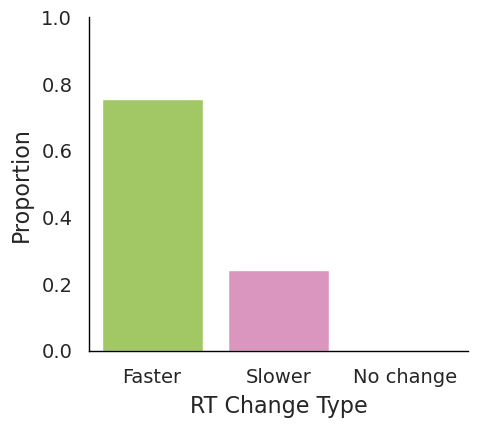

In [158]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Create proportion table

# change_summary = pd.DataFrame({'change_type': change_types})

# proportions = change_summary['change_type'].value_counts(normalize=True).reset_index()
# proportions.columns = ['change_type', 'proportion']

# # Optional: enforce category order
# order = ['Faster', 'Slower', 'No change']
# proportions['change_type'] = pd.Categorical(proportions['change_type'], categories=order, ordered=True)
# proportions = proportions.sort_values('change_type')

# # Plot settings
# plt.figure(figsize=(5, 4.5))
# sns.set(style="white", rc={"axes.grid": False})
# plt.rcParams.update({
#     "font.family": "DejaVu Sans",
#     "font.size": 14,
#     "axes.labelsize": 16,
#     "axes.titlesize": 16,
#     "xtick.labelsize": 14,
#     "ytick.labelsize": 14,
#     "axes.linewidth": 1.0,
#     "axes.edgecolor": "black",
# })

# # Plot
# bar_colors = {
#     'Faster': '#A6D854',
#     'Slower': '#E78AC3',
#     'No change': '#999999'
# }

# ax = sns.barplot(
#     data=proportions,
#     x='change_type',
#     y='proportion',
#     palette=bar_colors
# )

# # Labels and cleanup
# ax.set_ylabel("Proportion", labelpad=6)
# ax.set_xlabel("RT Change Type", labelpad=6)
# ax.set_ylim(0, 1)
# ax.tick_params(axis='both', labelsize=14, pad=6)
# sns.despine()

# plt.tight_layout()
# plt.savefig("rt_change_proportion_barplot.png", dpi=300)
# plt.show()


In [83]:
# import pandas as pd

# # Step 1: Merge VVIQ z-scores for each subject
# # Get subject-level VVIQ scores
# vviq_subject = df_task_questionnaire_subject[['subject', 'vviq_z']].drop_duplicates()

# # Step 2: Compute RT change type for each subject
# change_info = []

# for subj in mean_rt_img['subject'].unique():
#     subj_data = mean_rt_img[mean_rt_img['subject'] == subj]
#     if len(subj_data) == 2:
#         y_rt = subj_data.loc[subj_data['isMatch'] == 'y', 'mean_rt_img'].values[0]
#         n_rt = subj_data.loc[subj_data['isMatch'] == 'n', 'mean_rt_img'].values[0]
#         delta = y_rt - n_rt
#         if delta < 0:
#             change_type = 'Faster'
#         elif delta > 0:
#             change_type = 'Slower'
#         else:
#             change_type = 'No change'
#         change_info.append({'subject': subj, 'change_type': change_type})

# # Convert to DataFrame
# change_df = pd.DataFrame(change_info)

# # Step 3: Merge with VVIQ z-scores and bin into quantiles
# change_df = change_df.merge(vviq_subject, on='subject', how='left')
# change_df['vviq_group'] = pd.qcut(change_df['vviq_z'], q=3, labels=['Low', 'Medium', 'High'])

# # Step 4: Compute proportions within each VVIQ group
# grouped_prop = (
#     change_df
#     .groupby(['vviq_group', 'change_type'])
#     .size()
#     .reset_index(name='count')
# )

# # Normalize counts within each group
# grouped_prop['proportion'] = grouped_prop.groupby('vviq_group')['count'].transform(lambda x: x / x.sum())

# # Optional: enforce ordering for plotting
# grouped_prop['vviq_group'] = pd.Categorical(grouped_prop['vviq_group'], categories=['Low', 'Medium', 'High'], ordered=True)
# grouped_prop['change_type'] = pd.Categorical(grouped_prop['change_type'], categories=['Faster', 'Slower', 'No change'], ordered=True)

# # Preview
# display(grouped_prop)


/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/902473812.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['vviq_group', 'change_type'])
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/902473812.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_prop['proportion'] = grouped_prop.groupby('vviq_group')['count'].transform(lambda x: x / x.sum())


,vviq_group,change_type,count,proportion
0,Low,Faster,29,0.725000
1,Low,Slower,11,0.275000
2,Medium,Faster,25,0.735294
3,Medium,Slower,9,0.264706
4,High,Faster,30,0.810811
5,High,Slower,7,0.189189


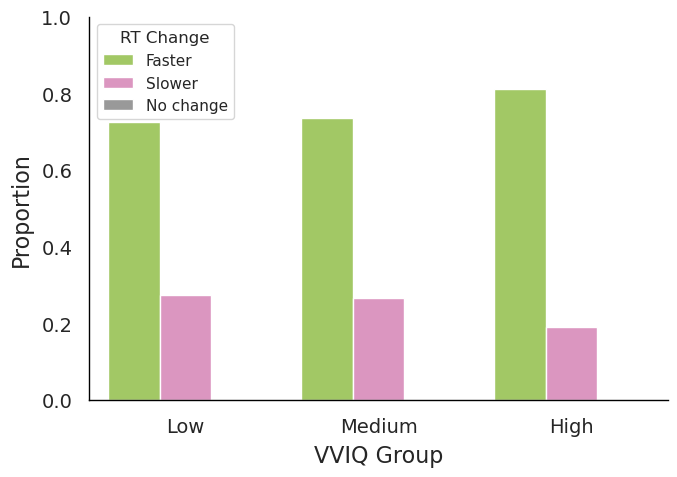

In [84]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style to match your previous plots
# sns.set(style="white", rc={"axes.grid": False})
# plt.rcParams.update({
#     "font.family": "DejaVu Sans",
#     "font.size": 14,
#     "axes.labelsize": 16,
#     "axes.titlesize": 16,
#     "xtick.labelsize": 14,
#     "ytick.labelsize": 14,
#     "axes.linewidth": 1.0,
#     "axes.edgecolor": "black",
# })

# # Color palette for change types
# palette = {
#     'Faster': '#A6D854',        # soft green
#     'Slower': '#E78AC3',        # soft pink
#     'No change': '#999999'      # gray
# }

# # Plot
# fig, ax = plt.subplots(figsize=(7, 5))
# sns.barplot(
#     data=grouped_prop,
#     x='vviq_group',
#     y='proportion',
#     hue='change_type',
#     palette=palette,
#     ax=ax
# )

# # Labels and formatting
# ax.set_xlabel("VVIQ Group", labelpad=6)
# ax.set_ylabel("Proportion", labelpad=6)
# ax.set_ylim(0, 1)
# ax.legend(title="RT Change")
# ax.tick_params(axis='both', labelsize=14, pad=6)

# sns.despine()
# plt.tight_layout()
# plt.savefig("rt_change_by_vviq_group.png", dpi=300)
# plt.show()


In [88]:
# contingency_table = pd.crosstab(
#     change_df.loc[change_df['change_type'].isin(['Faster', 'Slower']), 'vviq_group'],
#     change_df.loc[change_df['change_type'].isin(['Faster', 'Slower']), 'change_type']
# )

In [95]:
# import statsmodels.formula.api as smf

# # Only use Faster vs Slower
# logit_df = change_df[change_df['change_type'].isin(['Faster', 'Slower'])].copy()
# logit_df['is_faster'] = (logit_df['change_type'] == 'Faster').astype(int)

# model = smf.logit('is_faster ~ vviq_z', data=logit_df).fit()
# print(model.summary())


Optimization terminated successfully.
         Current function value: 0.553957
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              is_faster   No. Observations:                  111
Model:                          Logit   Df Residuals:                      109
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                0.001501
Time:                        23:52:25   Log-Likelihood:                -61.489
converged:                       True   LL-Null:                       -61.582
Covariance Type:            nonrobust   LLR p-value:                    0.6672
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1379      0.222      5.131      0.000       0.703       1.573
vviq_z         0.0959      0.

In [160]:
# Step 1: Merge mean_rt_img with proportion_correct
combined_df = pd.merge(mean_rt_img, proportion_correct, on=['subject', 'isMatch'], how='outer')

# Step 2: Merge the combined_df with df_task_questionnaire
df_task_questionnaire = pd.merge(combined_df, df_task_questionnaire, on=['subject', 'isMatch'], how='inner')

In [161]:
# Dropping duplicate rows based on 'subject' and 'isMatch' to avoid repeating the same information
df_task_questionnaire_subject = df_task_questionnaire.drop_duplicates(subset=['subject', 'isMatch'])

df_task_questionnaire_subject

,subject,isMatch,mean_rt_img,proportion_correct,percentage_correct,trial_index,trialIndex,sentence,image,trialType,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general,index,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std,irq_visual_mean,irq_verbal_mean,irq_ortho_mean,irq_manipulation_mean,osviq_spatial_mean,osviq_object_mean,osviq_verbal_mean,vviq_sum,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,09g1jpab,n,1350.750000,1.000000,100.000000,12,20,"<div style=""font-size: 30px;"">There was a lobs...","<img src=""Images/lobstermeat.jpg""/>",experimental,1691,2163,1,list_1,111284,y,y,1161,5c58244f62290e00012fa64c,1,5,1,5,1,3,2,4,5,2,5,5,1,1,4,5,2,3,1,5,2,4,3,3,4,3,3,1,4,1,1.0,1.0,1.0,1.0,2.0,5.0,3.0,5.0,4.0,1.0,3.0,1.0,5.0,2.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,1.0,5.0,1.0,1.0,5,NaN,2.0,76,1.0,NaN,1.0,4,1.0,NaN,1.0,4,no idea,1.0,I answered yes,NaN,0,1322.533333,2671.126776,1373.750000,580.260538,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
28,09g1jpab,y,1334.866667,1.000000,100.000000,6,40,"<div style=""font-size: 30px;"">There was a goos...","<img src=""Images/goose.jpg""/>",experimental,21345,2825,1,list_1,101076,y,y,1161,5c58244f62290e00012fa64c,1,5,1,5,1,3,2,4,5,2,5,5,1,1,4,5,2,3,1,5,2,4,3,3,4,3,3,1,4,1,1.0,1.0,1.0,1.0,2.0,5.0,3.0,5.0,4.0,1.0,3.0,1.0,5.0,2.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,1.0,5.0,1.0,1.0,5,NaN,2.0,76,1.0,NaN,1.0,4,1.0,NaN,1.0,4,no idea,1.0,I answered yes,NaN,0,1322.533333,2671.126776,1373.750000,580.260538,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
58,0a1mu6ef,n,573.413793,0.931034,93.103448,39,60,"<div style=""font-size: 30px;"">There was a frog...","<img src=""Images/frogsit.jpg""/>",experimental,757,509,1,list_1,71968,y,y,733,65b81b628b0e5ea84ab27b07,3,4,4,3,4,4,2,2,4,3,3,2,1,2,4,4,1,1,1,4,3,4,1,4,2,2,4,2,2,2,1.

In [162]:
# Merge with vviq_z scores per subject (assuming you have them in df_task_questionnaire_subject)
vviq_scores = df_task_questionnaire_subject[['subject', 'vviq_z']].drop_duplicates()
combined_df = combined_df.merge(vviq_scores, on='subject', how='left')

In [163]:
combined_df

,subject,isMatch,mean_rt_img,proportion_correct,percentage_correct,vviq_z
0,09g1jpab,n,1350.750000,1.000000,100.000000,-1.805460
1,09g1jpab,y,1334.866667,1.000000,100.000000,-1.805460
2,0a1mu6ef,n,573.413793,0.931034,93.103448,-0.458363
3,0a1mu6ef,y,591.172414,0.965517,96.551724,-0.458363
4,0q5f5cfx,n,641.714286,1.000000,100.000000,0.888734
...,...,...,...,...,...,...
217,zplbf8cc,y,714.000000,0.965517,96.551724,-1.131911
218,zqxespyp,n,2439.600000,0.466667,46.666667,0.804540
219,zqxespyp,y,1638.103448,0.413793,41.379310,0.804540
220,zqymv7ph,n,1288.482759,0.931034,93.103448,-0.121589


In [164]:
import pandas as pd
import numpy as np

# Initialize a list to collect change data for each subject
change_data = []

# Assign VVIQ group quantiles based on subject-level vviq_z
vviq_df = combined_df[['subject', 'vviq_z']].drop_duplicates()
vviq_df['vviq_group'] = pd.qcut(vviq_df['vviq_z'], q=3, labels=['Low', 'Medium', 'High'])

# Merge quantile info back to mean_rt_img
combined_df = combined_df.merge(vviq_df[['subject', 'vviq_group']], on='subject', how='left')

# Loop through each subject
for subj in combined_df['subject'].unique():
    subj_data = combined_df[mean_rt_img['subject'] == subj]
    
    if len(subj_data) == 2:
        subj_data_sorted = subj_data.sort_values('isMatch')
        y_rt = subj_data_sorted.loc[subj_data_sorted['isMatch'] == 'y', 'mean_rt_img'].values[0]
        n_rt = subj_data_sorted.loc[subj_data_sorted['isMatch'] == 'n', 'mean_rt_img'].values[0]
        vviq_group = subj_data_sorted['vviq_group'].values[0]

        delta = y_rt - n_rt
        if delta < 0:
            change_type = 'Faster'
        elif delta > 0:
            change_type = 'Slower'
        else:
            change_type = 'No change'

        change_data.append({'subject': subj, 'change_type': change_type, 'vviq_group': vviq_group})

# Create DataFrame of results
change_df = pd.DataFrame(change_data)

# Calculate proportion within each VVIQ group
proportions = (
    change_df
    .groupby(['vviq_group', 'change_type'])
    .size()
    .reset_index(name='count')
)

# Normalize within each group
proportions['proportion'] = proportions.groupby('vviq_group')['count'].transform(lambda x: x / x.sum())

# Optional: sort categories for nice plotting
proportions['vviq_group'] = pd.Categorical(proportions['vviq_group'], categories=['Low', 'Medium', 'High'], ordered=True)
proportions['change_type'] = pd.Categorical(proportions['change_type'], categories=['Faster', 'Slower', 'No change'], ordered=True)

# Display
print(proportions)


  vviq_group change_type  count  proportion
0       High      Faster     30    0.810811
1       High      Slower      7    0.189189
2        Low      Faster     29    0.725000
3        Low      Slower     11    0.275000
4     Medium      Faster     25    0.735294
5     Medium      Slower      9    0.264706


In [187]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# # Step 1: Make sure VVIQ group exists
# df_task_questionnaire = df_task_questionnaire.copy()
# if 'vviq_group' not in df_task_questionnaire.columns:
#     df_task_questionnaire['vviq_group'] = pd.qcut(df_task_questionnaire['vviq_z'], q=3, labels=['Low', 'Medium', 'High'])

# # Step 2: Prepare dumbbell data
# acc_dumbbell = (
#     df_task_questionnaire[df_task_questionnaire['isMatch'].isin(['n', 'y'])]
#     .groupby(['subject', 'vviq_group', 'isMatch'], observed=True)['percentage_correct']
#     .mean()
#     .unstack()
#     .reset_index()
#     .dropna(subset=['n', 'y'])  # Make sure both n and y are present
#     .rename(columns={'n': 'acc_mismatch', 'y': 'acc_match'})
# )

# # Step 3: Sort for visual clarity within each group
# acc_dumbbell = acc_dumbbell.sort_values(['vviq_group', 'acc_mismatch'], ascending=[True, False])

# # Step 4: Plot with FacetGrid
# g = sns.FacetGrid(
#     acc_dumbbell, 
#     col="vviq_group", 
#     sharex=True, 
#     sharey=False, 
#     height=5, 
#     aspect=1.2
# )

# def draw_dumbbells(data, **kwargs):
#     for i, row in data.iterrows():
#         plt.plot([row['acc_mismatch'], row['acc_match']], [i, i], color='gray', alpha=0.5)
#         plt.scatter(row['acc_mismatch'], i, color='#E78AC3', label='Mismatch' if i == 0 else "")
#         plt.scatter(row['acc_match'], i, color='#A6D854', label='Match' if i == 0 else "")
#     plt.yticks([])
#     plt.xlabel('Accuracy (%)')
#     plt.legend(loc='lower right')

# g.map_dataframe(draw_dumbbells)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Accuracy by Condition (Match vs Mismatch) — Dumbbell Plot by VVIQ Group")
# plt.tight_layout()
# plt.show()


In [188]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# # Step 1: Ensure VVIQ groups exist
# df_task_questionnaire = df_task_questionnaire.copy()
# if 'vviq_group' not in df_task_questionnaire.columns:
#     df_task_questionnaire['vviq_group'] = pd.qcut(df_task_questionnaire['vviq_z'], q=3, labels=['Low', 'Medium', 'High'])

# # Step 2: Prepare RT dumbbell data
# rt_dumbbell = (
#     df_task_questionnaire[df_task_questionnaire['isMatch'].isin(['n', 'y'])]
#     .groupby(['subject', 'vviq_group', 'isMatch'], observed=True)['mean_rt_img']
#     .mean()
#     .unstack()
#     .reset_index()
#     .dropna(subset=['n', 'y'])  # keep only subjects with both conditions
#     .rename(columns={'n': 'rt_mismatch', 'y': 'rt_match'})
# )

# # Step 3: Sort for visual clarity
# rt_dumbbell = rt_dumbbell.sort_values(['vviq_group', 'rt_mismatch'], ascending=[True, False])

# # Step 4: Plot with FacetGrid
# g = sns.FacetGrid(
#     rt_dumbbell, 
#     col="vviq_group", 
#     sharex=True, 
#     sharey=False, 
#     height=5, 
#     aspect=1.2
# )

# def draw_rt_dumbbells(data, **kwargs):
#     for i, row in data.iterrows():
#         plt.plot([row['rt_mismatch'], row['rt_match']], [i, i], color='gray', alpha=0.5)
#         plt.scatter(row['rt_mismatch'], i, color='#E78AC3', label='Mismatch' if i == 0 else "")
#         plt.scatter(row['rt_match'], i, color='#A6D854', label='Match' if i == 0 else "")
#     plt.yticks([])
#     plt.xlabel('Mean RT (ms)')
#     plt.legend(loc='upper right')

# g.map_dataframe(draw_rt_dumbbells)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Mean RT by Condition (Match vs Mismatch) — Dumbbell Plot by VVIQ Group")
# plt.tight_layout()
# plt.show()


In [189]:
# # Dropping duplicate rows based on 'subject' and 'isMatch' to avoid repeating the same information
# df_task_questionnaire_subject = df_task_questionnaire.drop_duplicates(subset=['subject', 'isMatch'])

# df_task_questionnaire_subject

,subject,isMatch,mean_rt_img,proportion_correct,percentage_correct,trial_index,trialIndex,sentence,image,trialType,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general,index,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std,irq_visual_mean,irq_verbal_mean,irq_ortho_mean,irq_manipulation_mean,osviq_spatial_mean,osviq_object_mean,osviq_verbal_mean,vviq_sum,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,09g1jpab,n,1350.750000,1.000000,100.000000,12,20,"<div style=""font-size: 30px;"">There was a lobs...","<img src=""Images/lobstermeat.jpg""/>",experimental,1691,2163,1,list_1,111284,y,y,1161,5c58244f62290e00012fa64c,1,5,1,5,1,3,2,4,5,2,5,5,1,1,4,5,2,3,1,5,2,4,3,3,4,3,3,1,4,1,1.0,1.0,1.0,1.0,2.0,5.0,3.0,5.0,4.0,1.0,3.0,1.0,5.0,2.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,1.0,5.0,1.0,1.0,5,NaN,2.0,76,1.0,NaN,1.0,4,1.0,NaN,1.0,4,no idea,1.0,I answered yes,NaN,0,1322.533333,2671.126776,1373.750000,580.260538,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
28,09g1jpab,y,1334.866667,1.000000,100.000000,6,40,"<div style=""font-size: 30px;"">There was a goos...","<img src=""Images/goose.jpg""/>",experimental,21345,2825,1,list_1,101076,y,y,1161,5c58244f62290e00012fa64c,1,5,1,5,1,3,2,4,5,2,5,5,1,1,4,5,2,3,1,5,2,4,3,3,4,3,3,1,4,1,1.0,1.0,1.0,1.0,2.0,5.0,3.0,5.0,4.0,1.0,3.0,1.0,5.0,2.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,1.0,5.0,1.0,1.0,5,NaN,2.0,76,1.0,NaN,1.0,4,1.0,NaN,1.0,4,no idea,1.0,I answered yes,NaN,0,1322.533333,2671.126776,1373.750000,580.260538,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
58,0a1mu6ef,n,573.413793,0.931034,93.103448,39,60,"<div style=""font-size: 30px;"">There was a frog...","<img src=""Images/frogsit.jpg""/>",experimental,757,509,1,list_1,71968,y,y,733,65b81b628b0e5ea84ab27b07,3,4,4,3,4,4,2,2,4,3,3,2,1,2,4,4,1,1,1,4,3,4,1,4,2,2,4,2,2,2,1.

In [166]:
# List of columns to keep
# # Set pandas option to display all rows
# pd.set_option('display.max_rows', None)
columns_to_keep = [
    'subject', 'isMatch', 'mean_rt_img', 'proportion_correct',
    'percentage_correct', 'age', 'gender', 'list', 'phenomenology', 'strategy_cat',
    'handedness', 'neurodivergent', 'irq_visual_mean', 'irq_verbal_mean', 'irq_ortho_mean',
    'irq_manipulation_mean', 'osviq_spatial_mean', 'osviq_object_mean', 'osviq_verbal_mean',
    'vviq_sum', 'vviq_z', 'irq_visual_z', 'irq_verbal_z', 'irq_ortho_z', 'irq_manipulation_z',
    'osviq_object_z', 'osviq_spatial_z', 'osviq_verbal_z'
]

# Subset the DataFrame to keep only the specified columns
df_task_questionnaire_subject = df_task_questionnaire_subject[columns_to_keep]
df_task_questionnaire_subject

,subject,isMatch,mean_rt_img,proportion_correct,percentage_correct,age,gender,list,phenomenology,strategy_cat,handedness,neurodivergent,irq_visual_mean,irq_verbal_mean,irq_ortho_mean,irq_manipulation_mean,osviq_spatial_mean,osviq_object_mean,osviq_verbal_mean,vviq_sum,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,09g1jpab,n,1350.750000,1.000000,100.000000,76,1.0,list_1,5,1.0,1.0,4,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
28,09g1jpab,y,1334.866667,1.000000,100.000000,76,1.0,list_1,5,1.0,1.0,4,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
58,0a1mu6ef,n,573.413793,0.931034,93.103448,28,1.0,list_1,3,1.0,1.0,4,3.3,3.416667,3.000000,2.375,2.200000,2.933333,3.066667,46.0,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
87,0a1mu6ef,y,591.172414,0.965517,96.551724,28,1.0,list_1,3,1.0,1.0,4,3.3,3.416667,3.000000,2.375,2.200000,2.933333,3.066667,46.0,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
116,0q5f5cfx,n,641.714286,1.000000,100.000000,38,2.0,list_1,1,1.0,1.0,2,4.3,3.083333,2.142857,3.625,3.866667,3.666667,2.000000,62.0,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,zplbf8cc,y,714.000000,0.965517,96.551724,39,2.0,list_1,3,2.0,1.0,4,2.5,2.833333,1.714286,3.500,2.333333,2.266667,2.733333,38.0,-1.131911,-1.716179,-1.383690,-1.214318,0.056326,-1.677693,-0.468190,-0.670078
6089,zqxespyp,n,2439.600000,0.466667,46.666667,39,2.0,list_4,1,1.0,1.0,4,4.3,3.750000,3.571429,3.875,3.133333,3.000000,2.866667,61.0,0.804540,0.713380,-0.133690,0.935423,0.560175,-0.643762,0.804450,-0.443228
6119,zqxespyp,y,1638.103448,0.413793,41.379310,39,2.0,list_4,1,1.0,1.0,4,4.3,3.750000,3.571429,3.875,3.133333,3.000000,2.866667,61.0,0.804540,0.713380,-0.133690,0.935423,0.560175,-0.643762,0.804450,-0.443228
6148,zqymv7ph,n,1288.482759,0.931034,93.103448,36,2.0,list_4,1,1.0,1.0,4,4.6,4.166667,4.000000,2.750,1.533333,4.866667,3.000000,50.0,-0.121589,1.118306,0.434492,1.431517,-0.951371,1.988062,-1.740831,-0.216377


In [167]:
## Descriptive Statistics
# Grouping by 'isMatch' and calculating summary statistics for 'rt_img'
rt_img_stats = df_task_questionnaire_subject.groupby('isMatch')['mean_rt_img'].describe()


# Grouping by 'isMatch' and calculating summary statistics for 'percentage_correct'
percentage_correct_stats = df_task_questionnaire_subject.groupby('isMatch')['percentage_correct'].describe()

# Optionally, you can concatenate these statistics into a single DataFrame for easier comparison
summary_stats = pd.concat([rt_img_stats, percentage_correct_stats], axis=1, keys=['rt_img', 'percentage_correct'])

# Display the result
print(summary_stats)


        rt_img                                                              \
         count        mean         std         min         25%         50%   
isMatch                                                                      
n        111.0  955.069975  385.396324  498.857143  712.574074  880.777778   
y        111.0  889.641727  314.355420  494.633333  688.398352  837.724138   

                                  percentage_correct                        \
                 75%          max              count       mean        std   
isMatch                                                                      
n        1080.054803  3533.344828              111.0  93.037578  11.496984   
y         997.435714  3031.896552              111.0  94.648688   8.387599   

                                                       
              min        25%        50%    75%    max  
isMatch                                                
n        20.00000  92.857143  96.428571  100.0  10

In [168]:
print(df_task_questionnaire_subject['percentage_correct'].dtype)
print(df_task_questionnaire_subject['percentage_correct'].isna().sum())

float64
0


/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/2176707636.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/2176707636.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/2176707636.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(match_labels)
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/2176707636.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/2176707636.py:62: Fut

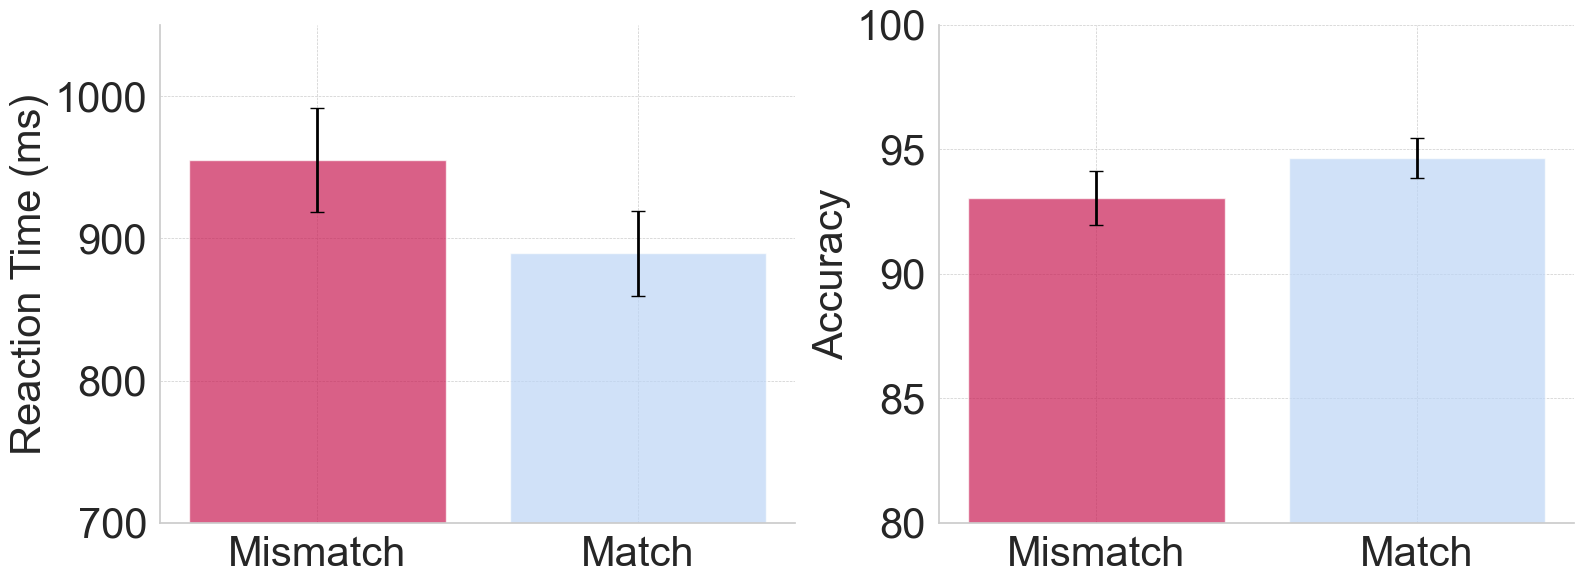

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t

# Set plot style
sns.set(style="whitegrid")

# === SUMMARY STATISTICS (±1 SEM ~67% CI) ===
summary_df = df_task_questionnaire_subject.groupby('isMatch')['mean_rt_img'].agg(
    mean_rt='mean',
    min_rt=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_rt=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

summary_df_pc = df_task_questionnaire_subject.groupby('isMatch')['percentage_correct'].agg(
    mean_pc='mean',
    min_pc=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_pc=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()


# === PLOTTING ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
match_labels = ['Mismatch', 'Match']

custom_palette = {
    'n': "#e60049",  # Vibrant pink
    'y': "#b3d4ff"   # Vivid green
}

# === REACTION TIME (IMAGE) PLOT ===
sns.barplot(
    data=df_task_questionnaire_subject,
    x='isMatch',
    y='mean_rt_img',
    ax=axes[0],
    estimator=np.mean,
    ci=None,
    palette=custom_palette
)
for bar in axes[0].patches:
    bar.set_alpha(0.7)
for index, row in summary_df.iterrows():
    axes[0].errorbar(
        x=index,
        y=row['mean_rt'],
        yerr=[[row['mean_rt'] - row['min_rt']], [row['max_rt'] - row['mean_rt']]],
        fmt='none',
        capsize=5,
        color='black',
        elinewidth=2
    )
axes[0].set_xlabel('')
axes[0].set_xticklabels(match_labels)
axes[0].set_ylabel('Reaction Time (ms)', fontsize=30)
axes[0].set_ylim([700, 1050])
axes[0].tick_params(axis='both', labelsize=30)
axes[0].grid(True, which='major', linestyle='--', linewidth=0.5)

# === ACCURACY PLOT ===
sns.barplot(
    data=df_task_questionnaire_subject,
    x='isMatch',
    y='percentage_correct',
    ax=axes[1],
    estimator=np.mean,
    ci=None,
    palette=custom_palette
)
for bar in axes[1].patches:
    bar.set_alpha(0.7)
for index, row in summary_df_pc.iterrows():
    axes[1].errorbar(
        x=index,
        y=row['mean_pc'],
        yerr=[[row['mean_pc'] - row['min_pc']], [row['max_pc'] - row['mean_pc']]],
        fmt='none',
        capsize=5,
        color='black',
        elinewidth=2
    )
axes[1].set_xlabel('')
axes[1].set_xticklabels(match_labels)
axes[1].set_ylabel('Accuracy', fontsize=30)
axes[1].set_ylim([80, 100])
axes[1].tick_params(axis='both', labelsize=30)
axes[1].grid(True, which='major', linestyle='--', linewidth=0.5)


# === FINAL TOUCHES ===
sns.despine()
plt.tight_layout()
plt.savefig('match_effect_bar_rt_acc.png')
plt.show()

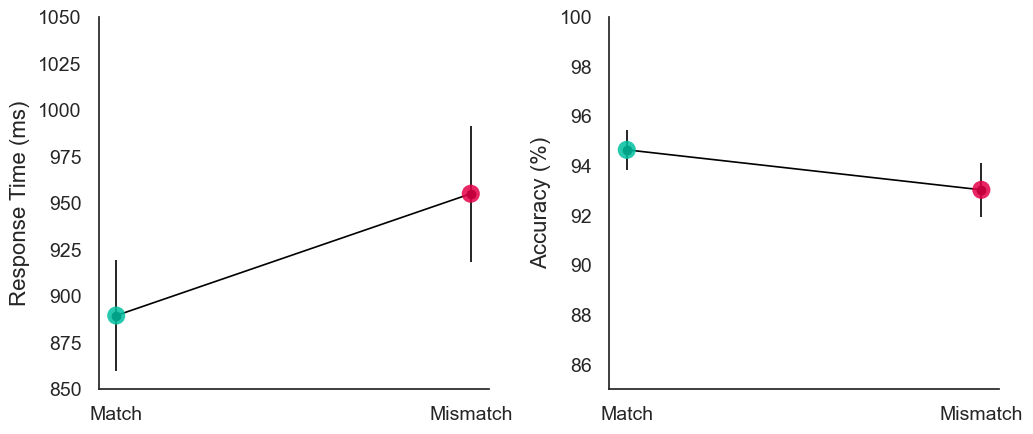

In [170]:
# Re-import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set plot style (clean, white background, no grid)
sns.set(style="white", rc={"axes.grid": False})

# === SUMMARY STATISTICS (±1 SEM ~67% CI) ===
summary_df = df_task_questionnaire_subject.groupby('isMatch')['mean_rt_img'].agg(
    mean_rt='mean',
    min_rt=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_rt=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

summary_df_pc = df_task_questionnaire_subject.groupby('isMatch')['percentage_correct'].agg(
    mean_pc='mean',
    min_pc=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_pc=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

# === REORDER TO MATCH -> MISMATCH ===
summary_df = summary_df.sort_values(by='isMatch', ascending=False).reset_index(drop=True)
summary_df_pc = summary_df_pc.sort_values(by='isMatch', ascending=False).reset_index(drop=True)

# Labels and colors
match_labels = ['Match', 'Mismatch']
custom_palette = {
    'y': "#00bfa0",  # Match
    'n': "#e60049"   # Mismatch
}
x_vals = [0, 1]

# === PLOTTING DIMENSIONS ===
fig_width = 5
fig_height = 4.5
fig, axes = plt.subplots(1, 2, figsize=(fig_width * 2.1, fig_height), sharey=False)

# === REACTION TIME PLOT ===
axes[0].plot(x_vals, summary_df['mean_rt'], color='black', marker='o', markersize=6, linewidth=1.2)
axes[0].errorbar(
    x=x_vals,
    y=summary_df['mean_rt'],
    yerr=[summary_df['mean_rt'] - summary_df['min_rt'], summary_df['max_rt'] - summary_df['mean_rt']],
    fmt='none',
    capsize=0,
    color='black',
    elinewidth=1.2
)
for i, val in enumerate(summary_df['mean_rt']):
    condition_key = ['y', 'n'][i]  # Match = 'y', Mismatch = 'n'
    axes[0].scatter(x_vals[i], val, color=custom_palette[condition_key], s=170, zorder=3, alpha=0.85, edgecolors='none')

axes[0].set_xticks(x_vals)
axes[0].set_xticklabels(match_labels)
axes[0].set_ylabel('Response Time (ms)', fontsize=16, labelpad=6)
axes[0].set_ylim([850, 1050])
axes[0].tick_params(axis='both', labelsize=14, pad=6)

# === ACCURACY PLOT ===
axes[1].plot(x_vals, summary_df_pc['mean_pc'], color='black', marker='o', markersize=6, linewidth=1.2)
axes[1].errorbar(
    x=x_vals,
    y=summary_df_pc['mean_pc'],
    yerr=[summary_df_pc['mean_pc'] - summary_df_pc['min_pc'], summary_df_pc['max_pc'] - summary_df_pc['mean_pc']],
    fmt='none',
    capsize=0,
    color='black',
    elinewidth=1.2
)
for i, val in enumerate(summary_df_pc['mean_pc']):
    condition_key = ['y', 'n'][i]  # Match = 'y', Mismatch = 'n'
    axes[1].scatter(x_vals[i], val, color=custom_palette[condition_key], s=170, zorder=3, alpha=0.85, edgecolors='none')

axes[1].set_xticks(x_vals)
axes[1].set_xticklabels(match_labels)
axes[1].set_ylabel('Accuracy (%)', fontsize=16, labelpad=6)
axes[1].set_ylim([85, 100])
axes[1].tick_params(axis='both', labelsize=14, pad=6)

# Final touches
sns.despine()
plt.tight_layout()
plt.savefig('match_effect_pointline_rt_acc.png', dpi=300)
plt.show()

In [171]:
print(summary_df[['isMatch', 'mean_rt', 'min_rt', 'max_rt']])
print("SEs (should be max_rt - mean_rt):")
print(summary_df['max_rt'] - summary_df['mean_rt'])

  isMatch     mean_rt      min_rt      max_rt
0       y  889.641727  859.804430  919.479023
1       n  955.069975  918.489775  991.650175
SEs (should be max_rt - mean_rt):
0    29.837296
1    36.580200
dtype: float64


In [209]:
# # Check error bar values
# print(summary_df_dp[['min_dp', 'mean_dp', 'max_dp']])

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/120781023.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=df_task_questionnaire_subject, x='isMatch', y='mean_rt_img', palette=custom_palette, estimator=np.mean, errorbar=None, ax=ax)
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/120781023.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mismatch', 'Match'], fontsize=20)  # Use the specified match labels


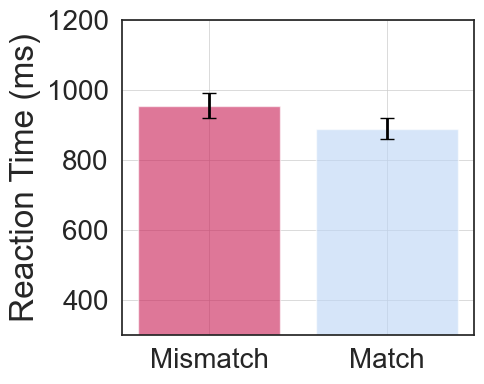

In [172]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(5, 4))

# Custom colors for the bars
custom_palette = {
    'n': "#e60049",  # Vibrant pink for 'Mismatch'
    'y': "#b3d4ff"  # Green for 'Match'
}

# Calculate mean_rt per subject for each isMatch condition
mean_rt_per_subject = df_task_questionnaire.groupby(['subject', 'isMatch'])['rt_img'].mean().reset_index()

# Bar plot with updated API usage
bar_plot = sns.barplot(data=df_task_questionnaire_subject, x='isMatch', y='mean_rt_img', palette=custom_palette, estimator=np.mean, errorbar=None, ax=ax)

# Adjust transparency after plotting for each bar
for bar in bar_plot.patches:
    bar.set_alpha(0.6)

# Calculate summary statistics for error bars
summary_df = df_task_questionnaire_subject.groupby('isMatch')['mean_rt_img'].agg(
    mean_rt='mean',
    min_rt=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_rt=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

# Adding error bars
for index, row in summary_df.iterrows():
    ax.errorbar(x=index, y=row['mean_rt'], yerr=[[row['mean_rt'] - row['min_rt']], [row['max_rt'] - row['mean_rt']]], fmt='none', capsize=5, color='black', elinewidth=2)


# Customize the plot
ax.set_xlabel('')
ax.set_xticklabels(['Mismatch', 'Match'], fontsize=20)  # Use the specified match labels
ax.set_ylabel('Reaction Time (ms)', fontsize=24)
ax.set_ylim([300, 1200])  # Adjust the y-axis limit
ax.tick_params(axis='y', labelsize=20)
ax.grid(True, which='major', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig('match_effect_bar.png')
plt.show()

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/85437674.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_21881/85437674.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mismatch', 'Match'], fontsize=20)


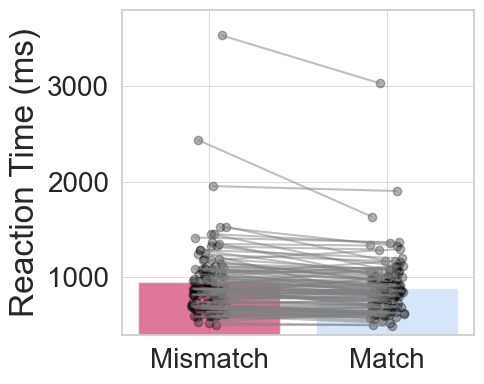

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# === Use per-subject average RTs ===
mean_rt_img = df_task_questionnaire.groupby(['subject', 'isMatch'])['rt_img'].mean().reset_index(name='mean_rt_img')

# === Compute group-level summary from the same data ===
summary_df = mean_rt_img.groupby('isMatch')['mean_rt_img'].agg(
    mean_rt='mean',
    min_rt=lambda x: x.mean() - 2*x.std()/np.sqrt(x.count()),
    max_rt=lambda x: x.mean() + 2*x.std()/np.sqrt(x.count())
).reset_index()

# === Start plotting ===
fig, ax = plt.subplots(figsize=(5, 4))

# Custom palette
custom_palette = {
    'n': "#e60049",  # Vibrant pink
    'y': "#b3d4ff"   # Green
}

# Bar plot
bar_plot = sns.barplot(
    data=mean_rt_img,
    x='isMatch',
    y='mean_rt_img',
    palette=custom_palette,
    estimator=np.mean,
    errorbar=None,
    ax=ax
)

# Adjust bar transparency
for bar in bar_plot.patches:
    bar.set_alpha(0.6)

# Add error bars
for index, row in summary_df.iterrows():
    ax.errorbar(
        x=index,
        y=row['mean_rt'],
        yerr=[[row['mean_rt'] - row['min_rt']], [row['max_rt'] - row['mean_rt']]],
        fmt='none',
        capsize=5,
        color='black',
        elinewidth=2
    )

# Overlay jittered points and connect them
np.random.seed(10)  
jitter_strength_x = 0.1
jitter_strength_y = 400
subject_positions = {}

for _, row in mean_rt_img.iterrows():
    position = 0 if row['isMatch'] == 'n' else 1
    jittered_x = position + np.random.uniform(-jitter_strength_x, jitter_strength_x)
    jittered_y = row['mean_rt_img']

    ax.plot(jittered_x, jittered_y, 'o', color='black', alpha=0.3)

    if row['subject'] not in subject_positions:
        subject_positions[row['subject']] = {}
    subject_positions[row['subject']][position] = (jittered_x, jittered_y)

for subject, pos in subject_positions.items():
    if len(pos) == 2:
        x_vals, y_vals = zip(*[pos[0], pos[1]])
        ax.plot(x_vals, y_vals, '-', color='grey', alpha=0.5)

# Keep all your original styling
ax.set_xlabel('')
ax.set_xticklabels(['Mismatch', 'Match'], fontsize=20)
ax.set_ylabel('Reaction Time (ms)', fontsize=24)
ax.set_ylim([400, 3800])
ax.tick_params(axis='y', labelsize=20)
ax.grid(True, which='major', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig('match_effect_bar_points_corrected.png')
plt.show()


In [175]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

df_task_questionnaire_subject

,subject,isMatch,mean_rt_img,proportion_correct,percentage_correct,age,gender,list,phenomenology,strategy_cat,handedness,neurodivergent,irq_visual_mean,irq_verbal_mean,irq_ortho_mean,irq_manipulation_mean,osviq_spatial_mean,osviq_object_mean,osviq_verbal_mean,vviq_sum,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,09g1jpab,n,1350.750000,1.000000,100.000000,76,1.0,list_1,5,1.0,1.0,4,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
28,09g1jpab,y,1334.866667,1.000000,100.000000,76,1.0,list_1,5,1.0,1.0,4,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
58,0a1mu6ef,n,573.413793,0.931034,93.103448,28,1.0,list_1,3,1.0,1.0,4,3.3,3.416667,3.000000,2.375,2.200000,2.933333,3.066667,46.0,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
87,0a1mu6ef,y,591.172414,0.965517,96.551724,28,1.0,list_1,3,1.0,1.0,4,3.3,3.416667,3.000000,2.375,2.200000,2.933333,3.066667,46.0,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
116,0q5f5cfx,n,641.714286,1.000000,100.000000,38,2.0,list_1,1,1.0,1.0,2,4.3,3.083333,2.142857,3.625,3.866667,3.666667,2.000000,62.0,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759
144,0q5f5cfx,y,686.142857,0.964286,96.428571,38,2.0,list_1,1,1.0,1.0,2,4.3,3.083333,2.142857,3.625,3.866667,3.666667,2.000000,62.0,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759
172,0zhjr0hs,n,530.647059,0.882353,88.235294,21,1.0,list_2,2,2.0,1.0,4,2.9,4.833333,4.714286,3.625,2.933333,2.933333,3.000000,31.0,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377
189,0zhjr0hs,y,638.000000,0.809524,80.952381,21,1.0,list_2,2,2.0,1.0,4,2.9,4.833333,4.714286,3.625,2.933333,2.933333,3.000000,31.0,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377
210,1ggpsz6b,n,635.740741,0.925926,92.592593,36,2.0,list_1,6,1.0,1.0,4,3.9,4.416667,2.285714,3.875,3.400000,3.866667,3.800000,45.0,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729
237,1ggpsz6b,y,636.250000,0.964286,96.428571,36,2.0,list_1,6,1.0,1.0,4,3.9,4.416667,2.285714,3.875,3.400000,3.866667,3.800000,45.0,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729


In [74]:
pd.reset_option('display.max_rows')

In [176]:
df_task_questionnaire_subject.shape

(222, 28)

In [177]:
# Group by subject and isMatch, then calculate the mean of vviq-sum and rt_img
mean_values_all_trials = df_task_questionnaire.groupby(['subject', 'isMatch']).agg({
    'vviq_sum': 'mean',
    'irq_visual_mean': 'mean',
    'irq_verbal_mean': 'mean',
    'osviq_object_mean': 'mean',
    'osviq_verbal_mean': 'mean',
    'proportion_correct': 'mean',  # already included — can keep or rename
    'hit': 'mean',            # this is the column you're asking about
    'vviq_z': 'mean',
    'irq_visual_z': 'mean',
    'irq_verbal_z': 'mean',
    'irq_ortho_z': 'mean',
    'irq_manipulation_z': 'mean',
    'osviq_object_z': 'mean',
    'osviq_spatial_z': 'mean',
    'osviq_verbal_z': 'mean'
}).reset_index()

# # Rename columns to indicate they are means
# mean_values_all_trials = mean_values_all_trials.rename(columns={
#     'vviq_sum': 'mean_vviq_sum',
#     'irq_visual_mean': 'mean_irq_visual',
#     'irq_verbal_mean': 'mean_irq_verbal',
#     'osviq_object_mean': 'mean_osviq_object',
#     'osviq_verbal_mean': 'mean_osviq_verbal',
#     'proportion_correct': 'mean_proportion_correct',
#     'hit': 'mean_accuracy',
#     'vviq_z': 'mean_vviq_z',
#     'irq_visual_z': 'mean_irq_visual_z',
#     'irq_verbal_z': 'mean_irq_verbal_z',
#     'irq_ortho_z': 'mean_irq_ortho_z',
#     'irq_manipulation_z': 'mean_irq_manipulation_z',
#     'osviq_object_z': 'mean_osviq_object_z',
#     'osviq_spatial_z': 'mean_osviq_spatial_z',
#     'osviq_verbal_z': 'mean_osviq_verbal_z'
# })

# The resulting DataFrame, mean_values_per_subject_isMatch, now has the mean vviq-sum and mean rt_img for each subject and isMatch level

In [178]:
mean_values_all_trials

,subject,isMatch,vviq_sum,irq_visual_mean,irq_verbal_mean,osviq_object_mean,osviq_verbal_mean,proportion_correct,hit,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,09g1jpab,n,30.0,2.9,1.250000,2.666667,4.266667,1.000000,1.000000,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
1,09g1jpab,y,30.0,2.9,1.250000,2.666667,4.266667,1.000000,1.000000,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
2,0a1mu6ef,n,46.0,3.3,3.416667,2.933333,3.066667,0.931034,0.931034,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
3,0a1mu6ef,y,46.0,3.3,3.416667,2.933333,3.066667,0.965517,0.965517,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
4,0q5f5cfx,n,62.0,4.3,3.083333,3.666667,2.000000,1.000000,1.000000,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759
5,0q5f5cfx,y,62.0,4.3,3.083333,3.666667,2.000000,0.964286,0.964286,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759
6,0zhjr0hs,n,31.0,2.9,4.833333,2.933333,3.000000,0.882353,0.882353,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377
7,0zhjr0hs,y,31.0,2.9,4.833333,2.933333,3.000000,0.809524,0.809524,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377
8,1ggpsz6b,n,45.0,3.9,4.416667,3.866667,3.800000,0.925926,0.925926,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729
9,1ggpsz6b,y,45.0,3.9,4.416667,3.866667,3.800000,0.964286,0.964286,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729


In [179]:
# Filter for correct trials only
# correct_trials = df_task_questionnaire[df_task_questionnaire['hit'] == 1]

# Group by subject and isMatch, then compute mean RTs
mean_values_rt = df_task_questionnaire.groupby(['subject', 'isMatch']).agg({
    'rt_img': 'mean',
    'rt_sent': 'mean',
}).reset_index()

In [180]:
mean_values_rt

,subject,isMatch,rt_img,rt_sent
0,09g1jpab,n,1350.750000,968.714286
1,09g1jpab,y,1334.866667,1703.900000
2,0a1mu6ef,n,573.413793,807.758621
3,0a1mu6ef,y,591.172414,869.000000
4,0q5f5cfx,n,641.714286,970.428571
5,0q5f5cfx,y,686.142857,775.178571
6,0zhjr0hs,n,530.647059,406.941176
7,0zhjr0hs,y,638.000000,489.047619
8,1ggpsz6b,n,635.740741,602.666667
9,1ggpsz6b,y,636.250000,520.750000


In [181]:
mean_values_all_trials = pd.merge(mean_values_all_trials, mean_values_rt,
                                           on=['subject', 'isMatch'], how='left')
mean_values_all_trials

,subject,isMatch,vviq_sum,irq_visual_mean,irq_verbal_mean,osviq_object_mean,osviq_verbal_mean,proportion_correct,hit,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z,rt_img,rt_sent
0,09g1jpab,n,30.0,2.9,1.250000,2.666667,4.266667,1.000000,1.000000,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,1350.750000,968.714286
1,09g1jpab,y,30.0,2.9,1.250000,2.666667,4.266667,1.000000,1.000000,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,1334.866667,1703.900000
2,0a1mu6ef,n,46.0,3.3,3.416667,2.933333,3.066667,0.931034,0.931034,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951,573.413793,807.758621
3,0a1mu6ef,y,46.0,3.3,3.416667,2.933333,3.066667,0.965517,0.965517,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951,591.172414,869.000000
4,0q5f5cfx,n,62.0,4.3,3.083333,3.666667,2.000000,1.000000,1.000000,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759,641.714286,970.428571
5,0q5f5cfx,y,62.0,4.3,3.083333,3.666667,2.000000,0.964286,0.964286,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759,686.142857,775.178571
6,0zhjr0hs,n,31.0,2.9,4.833333,2.933333,3.000000,0.882353,0.882353,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377,530.647059,406.941176
7,0zhjr0hs,y,31.0,2.9,4.833333,2.933333,3.000000,0.809524,0.809524,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377,638.000000,489.047619
8,1ggpsz6b,n,45.0,3.9,4.416667,3.866667,3.800000,0.925926,0.925926,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729,635.740741,602.666667
9,1ggpsz6b,y,45.0,3.9,4.416667,3.866667,3.800000,0.964286,0.964286,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729,636.250000,520.750000


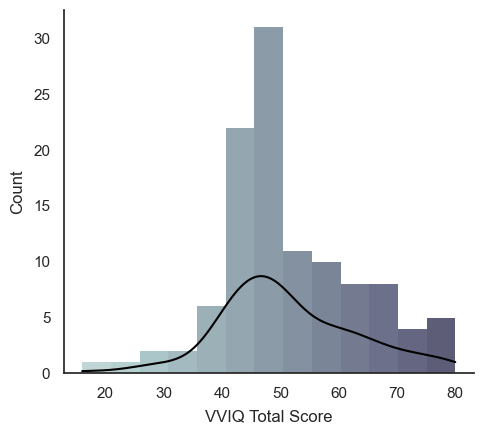

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

# Use real VVIQ values
vviq_vals = (
    df_task_questionnaire_subject
    .drop_duplicates(subset='subject')['vviq_sum']
)


# Set consistent font and style
import matplotlib as mpl
mpl.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "axes.linewidth": 1.0,
    "axes.edgecolor": "black",
})

# Set style
sns.set(style="white", rc={"axes.grid": False})

# === Truncate colormap to avoid faint colors ===
def truncate_colormap(cmap, minval=0.3, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval},{maxval})',
        cmap(np.linspace(minval, maxval, n))
    )

cmap = truncate_colormap(plt.get_cmap("bone"), 0.8, 0.3)

# === PLOTTING ===
fig_width = 5
fig_height = 4.5
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Plot histogram as counts
bin_edges = np.arange(vviq_vals.min(), vviq_vals.max() + 2, 2)
counts, bins, patches = ax.hist(
    vviq_vals,
    bins=13,
    edgecolor=None,
    density=False,
    alpha=0.9
)

# Apply gradient to bars
norm = plt.Normalize(vviq_vals.min(), vviq_vals.max())
for patch, left in zip(patches, bins[:-1]):
    patch.set_facecolor(cmap(norm(left)))
    patch.set_edgecolor('none')

# === Scaled KDE over count histogram ===
kde = gaussian_kde(vviq_vals)
x_range = np.linspace(vviq_vals.min(), vviq_vals.max(), 500)
# Rescale KDE to match histogram counts
kde_scaled = kde(x_range) * len(vviq_vals) * np.diff(bin_edges)[0]
ax.plot(x_range, kde_scaled, color='black', linewidth=1.5)

# Labels and final polish
ax.set_xlabel("VVIQ Total Score", labelpad=6)
ax.set_ylabel("Count", labelpad=6)

sns.despine()
plt.tight_layout()
plt.savefig("vviq_distribution_gradient_kde_countscale.png", dpi=300)
plt.show()

In [195]:
df_unique = df_task_questionnaire_subject.drop_duplicates(subset='subject')
vviq_summary = df_unique['vviq_sum'].agg(['mean', 'std', 'min', 'max']).round(2)
vviq_summary_df = vviq_summary.to_frame().T.rename(index={0: 'VVIQ Summary'})
vviq_summary_df.columns = ['Mean', 'SD', 'Min', 'Max']

print(vviq_summary_df)


           Mean     SD   Min   Max
vviq_sum  51.37  11.91  16.0  80.0


In [243]:
from scipy.stats import skew
skew_value = skew(df_unique['vviq_sum'])
print(f"Skewness: {skew_value:.3f}")


Skewness: 0.277


In [244]:
df_task_questionnaire_subject

,subject,isMatch,mean_rt_img,proportion_correct,percentage_correct,age,gender,list,phenomenology,strategy_cat,handedness,neurodivergent,irq_visual_mean,irq_verbal_mean,irq_ortho_mean,irq_manipulation_mean,osviq_spatial_mean,osviq_object_mean,osviq_verbal_mean,vviq_sum,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,09g1jpab,n,1350.750000,1.000000,100.000000,76,1.0,list_1,5,1.0,1.0,4,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
28,09g1jpab,y,1334.866667,1.000000,100.000000,76,1.0,list_1,5,1.0,1.0,4,2.9,1.250000,1.285714,2.250,1.533333,2.666667,4.266667,30.0,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707
58,0a1mu6ef,n,573.413793,0.931034,93.103448,28,1.0,list_1,3,1.0,1.0,4,3.3,3.416667,3.000000,2.375,2.200000,2.933333,3.066667,46.0,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
87,0a1mu6ef,y,591.172414,0.965517,96.551724,28,1.0,list_1,3,1.0,1.0,4,3.3,3.416667,3.000000,2.375,2.200000,2.933333,3.066667,46.0,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951
116,0q5f5cfx,n,641.714286,1.000000,100.000000,38,2.0,list_1,1,1.0,1.0,2,4.3,3.083333,2.142857,3.625,3.866667,3.666667,2.000000,62.0,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,zplbf8cc,y,714.000000,0.965517,96.551724,39,2.0,list_1,3,2.0,1.0,4,2.5,2.833333,1.714286,3.500,2.333333,2.266667,2.733333,38.0,-1.131911,-1.716179,-1.383690,-1.214318,0.056326,-1.677693,-0.468190,-0.670078
6089,zqxespyp,n,2439.600000,0.466667,46.666667,39,2.0,list_4,1,1.0,1.0,4,4.3,3.750000,3.571429,3.875,3.133333,3.000000,2.866667,61.0,0.804540,0.713380,-0.133690,0.935423,0.560175,-0.643762,0.804450,-0.443228
6119,zqxespyp,y,1638.103448,0.413793,41.379310,39,2.0,list_4,1,1.0,1.0,4,4.3,3.750000,3.571429,3.875,3.133333,3.000000,2.866667,61.0,0.804540,0.713380,-0.133690,0.935423,0.560175,-0.643762,0.804450,-0.443228
6148,zqymv7ph,n,1288.482759,0.931034,93.103448,36,2.0,list_4,1,1.0,1.0,4,4.6,4.166667,4.000000,2.750,1.533333,4.866667,3.000000,50.0,-0.121589,1.118306,0.434492,1.431517,-0.951371,1.988062,-1.740831,-0.216377


In [245]:
from scipy.stats import skew
skew_value = skew(df_task_questionnaire_subject.drop_duplicates(subset='subject')['vviq_sum'])
print(f"Skewness: {skew_value:.3f}")

Skewness: 0.277


/opt/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


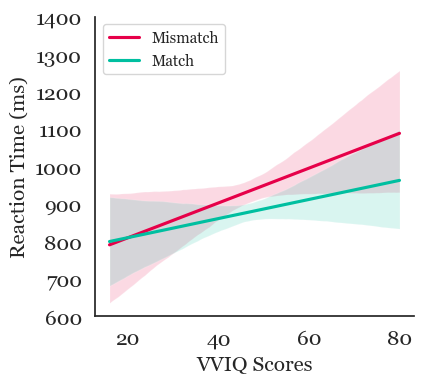

In [271]:
# Setting the font to Georgia
plt.rcParams['font.family'] = 'Georgia'

# Renaming 'isMatch' levels
mean_values_all_trials['isMatch'] = mean_values_all_trials['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Create a scatterplot with separate linear fit lines for each level of isMatch
plot = sns.lmplot(x='vviq_sum', y='rt_img', data=mean_values_all_trials, hue='isMatch',
                  palette=dict(Mismatch="#e60049", Match="#00bfa0"), legend_out=False, scatter=False,
                  height=4, aspect=1.1, ci=68)  # Set height=4 and aspect=1 for a 4x4 inch plot

# # Overlay the real data points with specified colors and increased transparency
# plt.scatter(mean_values_per_subject_isMatch.loc[mean_values_per_subject_isMatch['isMatch'] == 'Mismatch', 'vviq-sum'],
#             mean_values_per_subject_isMatch.loc[mean_values_per_subject_isMatch['isMatch'] == 'Mismatch', 'rt_img'],
#             color='#ff41ff', alpha=0.6)  # Slight transparency with alpha

# plt.scatter(mean_values_per_subject_isMatch.loc[mean_values_per_subject_isMatch['isMatch'] == 'Match', 'vviq-sum'],
#             mean_values_per_subject_isMatch.loc[mean_values_per_subject_isMatch['isMatch'] == 'Match', 'rt_img'],
#             color='#19c37d', alpha=0.6)  # Slight transparency with alpha

# Add labels and set y-axis limits
plt.ylim(600, 1400)
plt.xlabel('VVIQ Scores', fontsize=15)
plt.ylabel('Reaction Time (ms)', fontsize=15)

# Adjust tick parameters for both axes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plot._legend.set_title("")  # Set the title to an empty string


# Apply a tight layout and save the plot
plt.tight_layout()
plt.savefig('match_vviq.png')
plt.show()

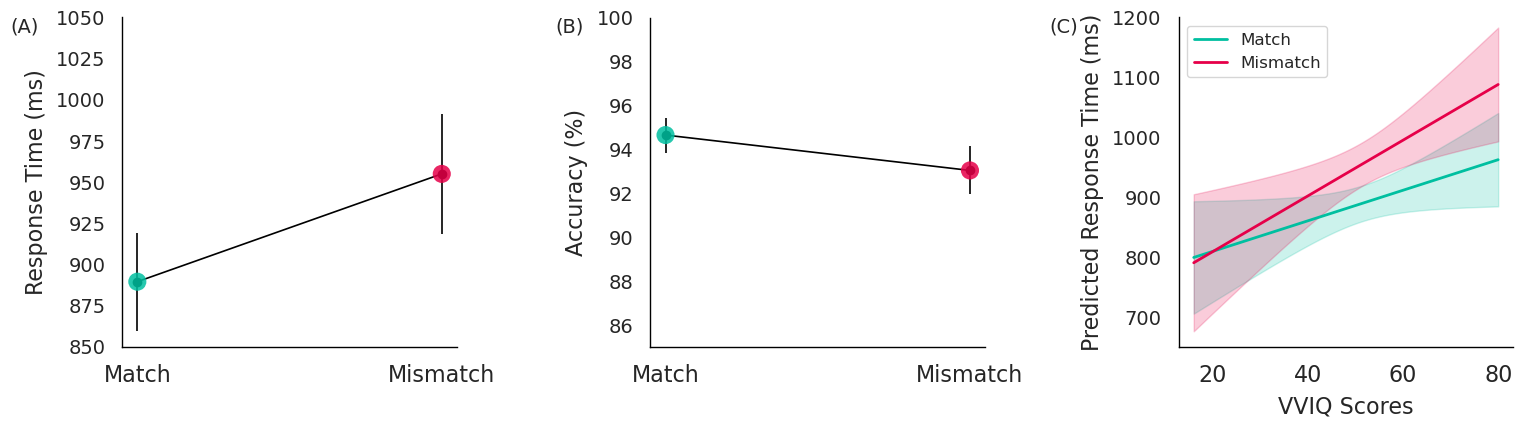

In [308]:
# Re-import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats

# Set plot style and font to DejaVu Sans
sns.set(style="white", rc={"axes.grid": False})
mpl.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 14,
    "axes.linewidth": 1.0,
    "axes.edgecolor": "black",
})

# === SUMMARY STATISTICS (±1 SEM ~67% CI) ===
summary_df = df_task_questionnaire_subject.groupby('isMatch')['mean_rt_img'].agg(
    mean_rt='mean',
    min_rt=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_rt=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

summary_df_pc = df_task_questionnaire_subject.groupby('isMatch')['percentage_correct'].agg(
    mean_pc='mean',
    min_pc=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_pc=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

# === REORDER TO MATCH -> MISMATCH ===
summary_df = summary_df.sort_values(by='isMatch', ascending=False).reset_index(drop=True)
summary_df_pc = summary_df_pc.sort_values(by='isMatch', ascending=False).reset_index(drop=True)

# Labels and colors
match_labels = ['Match', 'Mismatch']
custom_palette = {
    'y': "#00bfa0",  # Match
    'n': "#e60049"   # Mismatch
}
color_map = {'Mismatch': "#e60049", 'Match': "#00bfa0"}
x_vals = [0, 1]

# === PLOTTING DIMENSIONS ===
fig_width = 5
fig_height = 4.5
fig, axes = plt.subplots(1, 3, figsize=(fig_width * 3.1, fig_height), sharey=False)

# === REACTION TIME PLOT (First Panel) ===
# Add panel label (A) in the upper left corner
axes[0].text(-0.25, 1, '(A)', transform=axes[0].transAxes, 
             fontsize=14, va='top', ha='right')

axes[0].plot(x_vals, summary_df['mean_rt'], color='black', marker='o', markersize=6, linewidth=1.2)
axes[0].errorbar(
    x=x_vals,
    y=summary_df['mean_rt'],
    yerr=[summary_df['mean_rt'] - summary_df['min_rt'], summary_df['max_rt'] - summary_df['mean_rt']],
    fmt='none',
    capsize=0,
    color='black',
    elinewidth=1.2
)
for i, val in enumerate(summary_df['mean_rt']):
    condition_key = ['y', 'n'][i]  # Match = 'y', Mismatch = 'n'
    axes[0].scatter(x_vals[i], val, color=custom_palette[condition_key], s=170, zorder=3, alpha=0.85, edgecolors='none')

axes[0].set_xticks(x_vals)
axes[0].set_xticklabels(match_labels)
axes[0].set_ylabel('Response Time (ms)', labelpad=6)
axes[0].set_ylim([850, 1050])
axes[0].tick_params(axis='both', pad=6)

# === ACCURACY PLOT (Second Panel) ===
# Add panel label (B) in the upper left corner
axes[1].text(-0.2, 1, '(B)', transform=axes[1].transAxes, 
             fontsize=14, va='top', ha='right')

axes[1].plot(x_vals, summary_df_pc['mean_pc'], color='black', marker='o', markersize=6, linewidth=1.2)
axes[1].errorbar(
    x=x_vals,
    y=summary_df_pc['mean_pc'],
    yerr=[summary_df_pc['mean_pc'] - summary_df_pc['min_pc'], summary_df_pc['max_pc'] - summary_df_pc['mean_pc']],
    fmt='none',
    capsize=0,
    color='black',
    elinewidth=1.2
)
for i, val in enumerate(summary_df_pc['mean_pc']):
    condition_key = ['y', 'n'][i]  # Match = 'y', Mismatch = 'n'
    axes[1].scatter(x_vals[i], val, color=custom_palette[condition_key], s=170, zorder=3, alpha=0.85, edgecolors='none')

axes[1].set_xticks(x_vals)
axes[1].set_xticklabels(match_labels)
axes[1].set_ylabel('Accuracy (%)', labelpad=6)
axes[1].set_ylim([85, 100])
axes[1].tick_params(axis='both', pad=6)

# === VVIQ & REACTION TIME PLOT (Third Panel) ===
# Add panel label (C) in the upper left corner
axes[2].text(-0.3, 1, '(C)', transform=axes[2].transAxes, 
             fontsize=14, va='top', ha='right')

# We'll need to manually add the regression lines and data since we're not using lmplot directly

# Assuming mean_values_all_trials has already been prepared with 'isMatch' values as 'Match' and 'Mismatch'
# Get data for each group
match_data = mean_values_all_trials[mean_values_all_trials['isMatch'] == 'Match']
mismatch_data = mean_values_all_trials[mean_values_all_trials['isMatch'] == 'Mismatch']

# Calculate regression lines for each group
match_x = match_data['vviq_sum']
match_y = match_data['rt_img']
match_coeffs = np.polyfit(match_x, match_y, 1)
match_poly = np.poly1d(match_coeffs)

mismatch_x = mismatch_data['vviq_sum']
mismatch_y = mismatch_data['rt_img']
mismatch_coeffs = np.polyfit(mismatch_x, mismatch_y, 1)
mismatch_poly = np.poly1d(mismatch_coeffs)

# Create x values for plotting regression lines
match_x_plot = np.linspace(min(match_x), max(match_x), 100)
mismatch_x_plot = np.linspace(min(mismatch_x), max(mismatch_x), 100)

# Plot regression lines
axes[2].plot(match_x_plot, match_poly(match_x_plot), color=color_map['Match'], linewidth=2, label='Match')
axes[2].plot(mismatch_x_plot, mismatch_poly(mismatch_x_plot), color=color_map['Mismatch'], linewidth=2, label='Mismatch')

# Add shaded confidence intervals (68% CI which is approximately ±1 SEM)
# Function to calculate confidence intervals
def calculate_ci(x, y, confidence=0.68):
    n = len(x)
    mean_x = np.mean(x)
    ss_x = np.sum((x - mean_x)**2)
    
    def predict_interval(x_new, x, y):
        coeffs = np.polyfit(x, y, 1)
        poly = np.poly1d(coeffs)
        y_pred = poly(x_new)
        
        residuals = y - poly(x)
        std_resid = np.sqrt(np.sum(residuals**2) / (n - 2))
        
        t_value = stats.t.ppf((1 + confidence) / 2, n - 2)
        
        se_fit = std_resid * np.sqrt(1/n + (x_new - mean_x)**2 / ss_x)
        margin_error = t_value * se_fit
        
        upper = y_pred + margin_error
        lower = y_pred - margin_error
        return lower, upper
    
    return predict_interval

# Calculate and plot confidence intervals for Match
match_x_array = np.array(match_x)
match_y_array = np.array(match_y)
match_predict_interval = calculate_ci(match_x_array, match_y_array)

match_lower, match_upper = [], []
for x_val in match_x_plot:
    lower, upper = match_predict_interval(x_val, match_x_array, match_y_array)
    match_lower.append(lower)
    match_upper.append(upper)

axes[2].fill_between(match_x_plot, match_lower, match_upper, color=color_map['Match'], alpha=0.2)

# Calculate and plot confidence intervals for Mismatch
mismatch_x_array = np.array(mismatch_x)
mismatch_y_array = np.array(mismatch_y)
mismatch_predict_interval = calculate_ci(mismatch_x_array, mismatch_y_array)

mismatch_lower, mismatch_upper = [], []
for x_val in mismatch_x_plot:
    lower, upper = mismatch_predict_interval(x_val, mismatch_x_array, mismatch_y_array)
    mismatch_lower.append(lower)
    mismatch_upper.append(upper)

axes[2].fill_between(mismatch_x_plot, mismatch_lower, mismatch_upper, color=color_map['Mismatch'], alpha=0.2)

# Set third panel styling
axes[2].set_ylim(650, 1200)
axes[2].set_xlabel('VVIQ Scores', labelpad=6)
axes[2].set_ylabel('Predicted Response Time (ms)', labelpad=6)
axes[2].tick_params(axis='both', pad=6)
axes[2].legend(title="", fontsize=12)

# Final touches for the entire figure
sns.despine()
plt.tight_layout()
plt.savefig('match_effect_three_panel.png', dpi=300)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


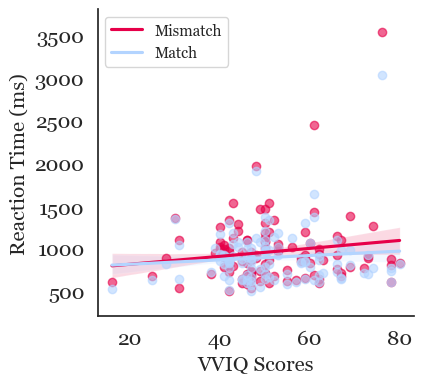

In [247]:
# Setting the font to Georgia
plt.rcParams['font.family'] = 'Georgia'

# Renaming 'isMatch' levels
mean_values_all_trials['isMatch'] = mean_values_all_trials['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Create a scatterplot with separate linear fit lines for each level of isMatch
plot = sns.lmplot(x='vviq_sum', y='rt_img', data=mean_values_all_trials, hue='isMatch',
                  palette=dict(Mismatch="#e60049", Match="#b3d4ff"), legend_out=False, scatter=False,
                  height=4, aspect=1.1, ci=68)  # Set height=4 and aspect=1 for a 4x4 inch plot

# Overlay the real data points with specified colors and increased transparency
plt.scatter(mean_values_all_trials.loc[mean_values_all_trials['isMatch'] == 'Mismatch', 'vviq_sum'],
            mean_values_all_trials.loc[mean_values_all_trials['isMatch'] == 'Mismatch', 'rt_img'],
            color='#e60049', alpha=0.6)  # Slight transparency with alpha

plt.scatter(mean_values_all_trials.loc[mean_values_all_trials['isMatch'] == 'Match', 'vviq_sum'],
            mean_values_all_trials.loc[mean_values_all_trials['isMatch'] == 'Match', 'rt_img'],
            color='#b3d4ff', alpha=0.6)  # Slight transparency with alpha

# Add labels and set y-axis limits
plt.ylim(200, 3800)
plt.xlabel('VVIQ Scores', fontsize=15)
plt.ylabel('Reaction Time (ms)', fontsize=15)

# Adjust tick parameters for both axes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plot._legend.set_title("")  # Set the title to an empty string


# Apply a tight layout and save the plot
plt.tight_layout()
plt.savefig('match_vviq_ppts.png')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


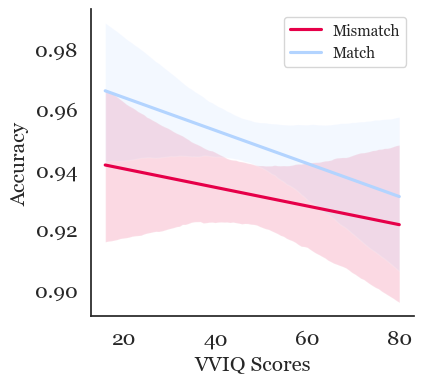

In [248]:
# Setting the font to Georgia
plt.rcParams['font.family'] = 'Georgia'

# Renaming 'isMatch' levels
mean_values_all_trials['isMatch'] = mean_values_all_trials['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Create a scatterplot with separate linear fit lines for each level of isMatch
plot = sns.lmplot(x='vviq_sum', y='proportion_correct', data=mean_values_all_trials, hue='isMatch',
                  palette=dict(Mismatch="#e60049", Match="#b3d4ff"), legend_out=False, scatter=False,
                  height=4, aspect=1.1, ci=68)  # Set height=4 and aspect=1 for a 4x4 inch plot

# Add labels and set y-axis limits
# plt.ylim(200, 3800)
plt.xlabel('VVIQ Scores', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

# Adjust tick parameters for both axes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plot._legend.set_title("")  # Set the title to an empty string


# Apply a tight layout and save the plot
plt.tight_layout()
plt.savefig('match_vviq_acc.png')
plt.show()


In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import t

# Set font
plt.rcParams['font.family'] = 'Georgia'

# Rename levels
# df = mean_values_all_trials.copy()
df = df_task_questionnaire.copy()
df['isMatch'] = df['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Bin VVIQ scores into 4 quantile-based bins (adjust q if needed)
df['vviq_bin'] = pd.qcut(df['vviq_z'], q=2)

# Compute mean RT and 68% CI per bin × isMatch
summary = df.groupby(['vviq_bin', 'isMatch']).agg(
    mean_rt=('rt_img', 'mean'),
    count=('rt_img', 'count'),
    std=('rt_img', 'std')
).reset_index()
summary['se'] = summary['std'] / np.sqrt(summary['count'])
summary['ci68'] = summary['se'] * t.ppf(0.84, df=summary['count'] - 1)  # 68% CI from t-dist

# For plotting, assign numeric x values to bins
summary['x'] = summary['vviq_bin'].apply(lambda b: b.mid)

# Color mapping
color_map = dict(Mismatch="#e60049", Match="#00bfa0")

# # Plot regression lines (no scatter)
# plot = sns.lmplot(
#     x='vviq_sum',
#     y='rt_img',
#     data=df,
#     hue='isMatch',
#     palette=color_map,
#     legend_out=False,
#     scatter=False,
#     ci=68,
#     height=4,
#     aspect=1.1
# )

# Add mean ± CI per bin as dots with error bars
for label in ['Mismatch', 'Match']:
    subset = summary[summary['isMatch'] == label]
    plt.errorbar(
        x=subset['x'],
        y=subset['mean_rt'],
        yerr=subset['ci68'],
        fmt='o',
        color=color_map[label],
        label=f'{label} binned',
        capsize=4,
        markersize=5,
        alpha=0.8
    )

for label in ['Mismatch', 'Match']:
    subset = summary[summary['isMatch'] == label]
    plt.plot(
        subset['x'],              # midpoints of bins on x-axis
        subset['mean_rt'],        # mean RT per bin
        color=color_map[label],   # same color as points
        linewidth=2,
        alpha=0.8
    )

# Style
plt.ylim(700, 1200)
plt.xlabel('VVIQ Scores', fontsize=15)
plt.ylabel('Reaction Time (ms)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(800,1100)
plot._legend.set_title("")

plt.tight_layout()
plt.savefig('match_vviq_binned.png')
plt.show()

KeyError: 'vviq_z'

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import t

# Set font
plt.rcParams['font.family'] = 'Georgia'

# Replace values for isMatch
df = df_task_questionnaire.copy()
df['isMatch'] = df['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Color mapping
color_map = {'Mismatch': "#e60049", 'Match': "#00bfa0"}

# --- lmplot: regression with 68% CI ---
plot = sns.lmplot(
    data=df,
    x='vviq_sum',
    y='rt_img',
    hue='isMatch',
    palette=color_map,
    scatter=False,
    ci=95,
    height=5,
    aspect=1.3
)

# --- Binned Means with Error Bars ---
df['vviq_bin'] = pd.qcut(df['vviq_sum'], q=3)

summary = df.groupby(['vviq_bin', 'isMatch']).agg(
    mean_rt=('rt_img', 'mean'),
    count=('rt_img', 'count'),
    std=('rt_img', 'std')
).reset_index()

# Compute 95% CI instead of 68%
summary['se'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['se'] * t.ppf(0.975, df=summary['count'] - 1)
summary['x'] = summary['vviq_bin'].apply(lambda b: b.mid)


# Style
ax.set_ylim(700, 1200)
ax.set_xlabel("VVIQ Scores", fontsize=15)
ax.set_ylabel("Reaction Time (ms)", fontsize=15)
ax.tick_params(axis='both', labelsize=13)
plot._legend.set_title("")

plt.tight_layout()
plt.savefig("match_vviq_lm_binned.png", dpi=300)
plt.show()


KeyError: "['vviq_sum'] not in index"

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import t

# Set font
plt.rcParams['font.family'] = 'Georgia'

# Replace values for isMatch
df = df_task_questionnaire.copy()
df['isMatch'] = df['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Color mapping
color_map = {'Mismatch': "#e60049", 'Match': "#00bfa0"}

# --- lmplot: regression with 68% CI ---
plot = sns.lmplot(
    data=df,
    x='vviq_sum',
    y='rt_img',
    hue='isMatch',
    palette=color_map,
    scatter=False,
    ci=95,
    height=5,
    aspect=1.3
)

# --- Binned Means with Error Bars ---
df['vviq_bin'] = pd.qcut(df['vviq_sum'], q=3)

summary = df.groupby(['vviq_bin', 'isMatch']).agg(
    mean_rt=('rt_img', 'mean'),
    count=('rt_img', 'count'),
    std=('rt_img', 'std')
).reset_index()

# Compute 95% CI instead of 68%
summary['se'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['se'] * t.ppf(0.975, df=summary['count'] - 1)
summary['x'] = summary['vviq_bin'].apply(lambda b: b.mid)

# Add points and error bars (with 95% CI now)
ax = plot.ax
for label in ['Mismatch', 'Match']:
    subset = summary[summary['isMatch'] == label]
    ax.errorbar(
        x=subset['x'],
        y=subset['mean_rt'],
        yerr=subset['ci95'],  # ← changed here
        fmt='o',
        color=color_map[label],
        capsize=4,
        markersize=6,
        label=f'{label} (binned)',
        alpha=0.85
    )

# Style
ax.set_ylim(700, 1200)
ax.set_xlabel("VVIQ Scores", fontsize=15)
ax.set_ylabel("Reaction Time (ms)", fontsize=15)
ax.tick_params(axis='both', labelsize=13)
plot._legend.set_title("")

plt.tight_layout()
plt.savefig("match_vviq_lm_binned.png", dpi=300)
plt.show()


KeyError: "['vviq_sum'] not in index"

In [256]:
df

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general,index,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std
0,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,Match,1018,625,1,list_2,65041,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
1,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,Match,844,782,1,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
2,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,Mismatch,754,690,1,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
3,0zhjr0hs,27,48,"<div sty

In [257]:
# Ensure isMatch is labeled properly
mean_values_all_trials['isMatch'] = mean_values_all_trials['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Pivot each variable separately
rt_pivot = mean_values_all_trials.pivot_table(index='subject', columns='isMatch', values='rt_img').reset_index()
prop_corr_pivot = mean_values_all_trials.pivot_table(index='subject', columns='isMatch', values='proportion_correct').reset_index()

# Remove column index names for clarity
for df in [rt_pivot, prop_corr_pivot]:
    df.columns.name = None  # remove 'isMatch' from the column header

# Optional: Rename columns (for clarity)
rt_pivot.rename(columns={'Match': 'rt_Match', 'Mismatch': 'rt_Mismatch'}, inplace=True)
prop_corr_pivot.rename(columns={'Match': 'accuracy_Match', 'Mismatch': 'accuracy_Mismatch'}, inplace=True)

# Merge all into one final pivoted dataframe
pivot_df = rt_pivot.merge(prop_corr_pivot, on='subject')

In [258]:
pivot_df

,subject,rt_Match,rt_Mismatch,accuracy_Match,accuracy_Mismatch
0,09g1jpab,1334.866667,1350.750000,1.000000,1.000000
1,0a1mu6ef,591.172414,573.413793,0.965517,0.931034
2,0q5f5cfx,686.142857,641.714286,0.964286,1.000000
3,0zhjr0hs,638.000000,530.647059,0.809524,0.882353
4,1ggpsz6b,636.250000,635.740741,0.964286,0.925926
...,...,...,...,...,...
106,zg96qrwn,658.913043,695.521739,0.956522,0.956522
107,zlnw3q3w,3031.896552,3533.344828,0.620690,0.551724
108,zplbf8cc,714.000000,692.310345,0.965517,1.000000
109,zqxespyp,1638.103448,2439.600000,0.413793,0.466667


In [259]:
# 1. Ensure isMatch column is properly labeled
mean_values_all_trials['isMatch'] = mean_values_all_trials['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# 2. Pivot key metrics by subject and isMatch
rt_pivot = mean_values_all_trials.pivot_table(index='subject', columns='isMatch', values='rt_img').reset_index()
acc_pivot = mean_values_all_trials.pivot_table(index='subject', columns='isMatch', values='proportion_correct').reset_index()

# 3. Remove column name from pivoted columns for cleanliness
for df in [rt_pivot, acc_pivot]:
    df.columns.name = None

# 4. Rename pivoted columns for clarity
rt_pivot.rename(columns={'Match': 'rt_Match', 'Mismatch': 'rt_Mismatch'}, inplace=True)
acc_pivot.rename(columns={'Match': 'accuracy_Match', 'Mismatch': 'accuracy_Mismatch'}, inplace=True)

# 5. Merge all three pivot tables into one
pivot_df = rt_pivot.merge(acc_pivot, on='subject')

# 6. Calculate match effects (Mismatch - Match) for each metric
pivot_df['match_effect_rt'] = pivot_df['rt_Mismatch'] - pivot_df['rt_Match']
pivot_df['match_effect_accuracy'] = pivot_df['accuracy_Mismatch'] - pivot_df['accuracy_Match']

# 7. Extract invariant subject-level questionnaire data (only from Mismatch rows to avoid duplication)
invariant_columns = mean_values_all_trials[mean_values_all_trials['isMatch'] == 'Mismatch'].set_index('subject')[[
    'vviq_sum', 'irq_visual_mean', 'irq_verbal_mean', 'osviq_object_mean', 'osviq_verbal_mean', 
    'vviq_z', 'irq_visual_z', 'irq_verbal_z', 'irq_ortho_z', 'irq_manipulation_z', 
    'osviq_object_z', 'osviq_spatial_z', 'osviq_verbal_z'
]].drop_duplicates()

# 8. Ensure pivot_df is indexed by subject
pivot_df.set_index('subject', inplace=True, drop=False)

# 9. Optional: Check for NaNs in match effects before merge
print("NaNs in match_effect_rt:", pivot_df['match_effect_rt'].isna().sum())
print("NaNs in match_effect_accuracy:", pivot_df['match_effect_accuracy'].isna().sum())

# 10. Join match effects with invariant subject-level measures
result_df = invariant_columns.join(
    pivot_df[['match_effect_rt', 'match_effect_accuracy']],
    how='inner'
)

# 11. Reset index to make 'subject' a column again
result_df.reset_index(inplace=True)

# 12. Done — preview the result
result_df.head()

NaNs in match_effect_rt: 0
NaNs in match_effect_accuracy: 0


,subject,vviq_sum,irq_visual_mean,irq_verbal_mean,osviq_object_mean,osviq_verbal_mean,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z,match_effect_rt,match_effect_accuracy
0,09g1jpab,30.0,2.9,1.250000,2.666667,4.266667,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,15.883333,0.000000
1,0a1mu6ef,46.0,3.3,3.416667,2.933333,3.066667,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951,-17.758621,-0.034483
2,0q5f5cfx,62.0,4.3,3.083333,3.666667,2.000000,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759,-44.428571,0.035714
3,0zhjr0hs,31.0,2.9,4.833333,2.933333,3.000000,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377,-107.352941,0.072829
4,1ggpsz6b,45.0,3.9,4.416667,3.866667,3.800000,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729,-0.509259,-0.038360


In [260]:
result_df.shape

(111, 16)

In [261]:
import statsmodels.formula.api as smf

# Reaction Time match effect ~ vviq_z
rt_model = smf.mixedlm("match_effect_rt ~ vviq_z", data=result_df, groups=result_df["subject"]).fit()
print("\n=== Reaction Time Match Effect Model ===")
print(rt_model.summary())

# Accuracy match effect ~ vviq_z
accuracy_model = smf.mixedlm("match_effect_accuracy ~ vviq_z", data=result_df, groups=result_df["subject"]).fit()
print("\n=== Accuracy Match Effect Model ===")
print(accuracy_model.summary())



=== Reaction Time Match Effect Model ===
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: match_effect_rt
No. Observations: 111     Method:             REML           
No. Groups:       111     Scale:              9073.9012      
Min. group size:  1       Log-Likelihood:     -693.8153      
Max. group size:  1       Converged:          Yes            
Mean group size:  1.0                                        
--------------------------------------------------------------
              Coef.    Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept      65.585     3.816  17.188  0.000  58.106  73.064
vviq_z         24.941    12.254   2.035  0.042   0.923  48.958
Group Var    9073.901                                         


=== Accuracy Match Effect Model ===
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: match_effect_accuracy

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


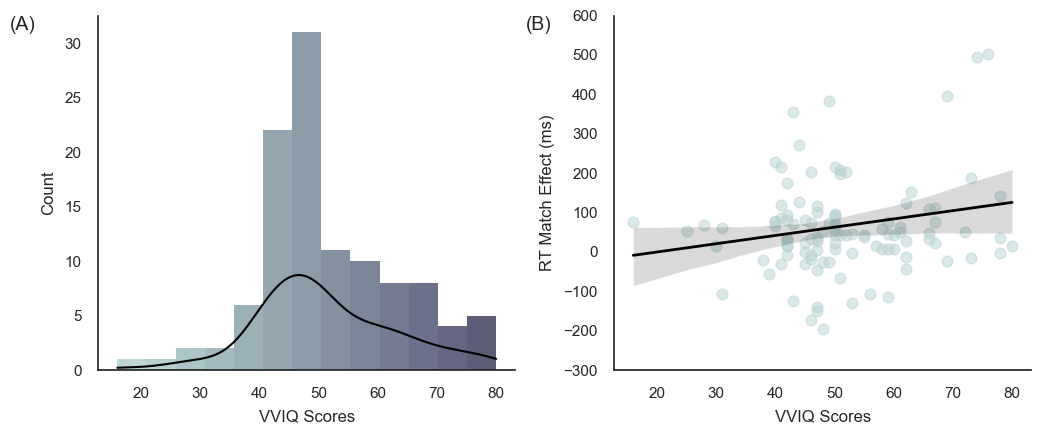

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# === Set consistent fonts and styles ===
mpl.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "axes.linewidth": 1.0,
    "axes.edgecolor": "black",
})
sns.set(style="white", rc={"axes.grid": False})

# === Extract real values for plotting (drop duplicate subjects) ===
vviq_vals = df_task_questionnaire_subject.drop_duplicates(subset='subject')['vviq_sum']
match_effect_vals = result_df['match_effect_rt']
x_vals = result_df['vviq_sum']

# === Truncate colormap ===
def truncate_colormap(cmap, minval=0.3, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval},{maxval})',
        cmap(np.linspace(minval, maxval, n))
    )
cmap = truncate_colormap(plt.get_cmap("bone"), 0.8, 0.3)

# === Plot dimensions ===
fig_width = 5
fig_height = 4.5
fig, axes = plt.subplots(1, 2, figsize=(fig_width * 2.1, fig_height))

# === Histogram with KDE ===
# Add panel label (A) in the upper left corner
axes[0].text(-0.15, 1, '(A)', transform=axes[0].transAxes, 
             fontsize=14, va='top', ha='right')

bin_edges = np.arange(vviq_vals.min(), vviq_vals.max() + 2, 2)
counts, bins, patches = axes[0].hist(
    vviq_vals,
    bins=13,
    edgecolor=None,
    density=False,
    alpha=0.9
)

# Gradient coloring
norm = plt.Normalize(vviq_vals.min(), vviq_vals.max())
for patch, left in zip(patches, bins[:-1]):
    patch.set_facecolor(cmap(norm(left)))
    patch.set_edgecolor('none')

# KDE scaled to histogram
kde = gaussian_kde(vviq_vals)
x_range = np.linspace(vviq_vals.min(), vviq_vals.max(), 500)
kde_scaled = kde(x_range) * len(vviq_vals) * np.diff(bin_edges)[0]
axes[0].plot(x_range, kde_scaled, color='black', linewidth=1.5)

# Labels for histogram
axes[0].set_xlabel("VVIQ Scores", labelpad=6)
axes[0].set_ylabel("Count", labelpad=6)
axes[0].tick_params(axis='both', pad=6)

# === RT Match Effect ~ VVIQ ===
# Add panel label (B) in the upper left corner
axes[1].text(-0.15, 1, '(B)', transform=axes[1].transAxes, 
             fontsize=14, va='top', ha='right')

bone_cmap = plt.get_cmap('bone')
scatter_color = bone_cmap(0.8)
line_color = bone_cmap(1)
sns.regplot(
    x=x_vals,
    y=match_effect_vals,
    scatter=True,
    ci=95,
    ax=axes[1],
    scatter_kws={'s': 60, 'alpha': 0.5, 'color': scatter_color},
    line_kws={'color': line_color, 'linewidth': 2}
)
axes[1].set_xlabel("VVIQ Scores", labelpad=6)
axes[1].set_ylabel("RT Match Effect (ms)", labelpad=6)
axes[1].set_ylim(-300, 600)
axes[1].tick_params(axis='both', pad=6)

# === Final formatting ===
sns.despine()
plt.tight_layout()
plt.savefig("facet_vviq_distribution_and_match_effect.png", dpi=300)
plt.show()

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib as mpl

# === Match consistent fonts and style ===
mpl.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "axes.linewidth": 1.0,
    "axes.edgecolor": "black",
})
sns.set(style="white", rc={"axes.grid": False})

# === Replace values for isMatch ===
df = df_task_questionnaire.copy()
df['isMatch'] = df['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# === Color mapping ===
color_map = {'Mismatch': "#e60049", 'Match': "#00bfa0"}

# === lmplot: regression with 95% CI ===
plot = sns.lmplot(
    data=df,
    x='vviq_sum',
    y='rt_img',
    hue='isMatch',
    palette=color_map,
    scatter=False,
    ci=95,
#     height=5,      # ← updated height
    aspect=10/9    # ← to make width = 10 inches
)

# === Binned Means with Error Bars ===
df['vviq_bin'] = pd.qcut(df['vviq_sum'], q=3)

summary = df.groupby(['vviq_bin', 'isMatch']).agg(
    mean_rt=('rt_img', 'mean'),
    count=('rt_img', 'count'),
    std=('rt_img', 'std')
).reset_index()

summary['se'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['se'] * t.ppf(0.975, df=summary['count'] - 1)
summary['x'] = summary['vviq_bin'].apply(lambda b: b.mid)

# Plot binned points and error bars manually on top
ax = plot.ax
for label in ['Mismatch', 'Match']:
    subset = summary[summary['isMatch'] == label]
    ax.errorbar(
        x=subset['x'],
        y=subset['mean_rt'],
        yerr=subset['ci95'],
        fmt='o',
        color=color_map[label],
        capsize=4,
        markersize=6,
        alpha=0.9,
        label=f'{label} (binned)'
    )

# === Style tweaks ===
ax.set_ylim(700, 1200)
ax.set_xlabel("VVIQ Scores", labelpad=6)
ax.set_ylabel("Reaction Time (ms)", labelpad=6)
ax.tick_params(axis='both', labelsize=14, pad=6)
plot._legend.set_title("")

sns.despine()
plt.tight_layout()
plt.savefig("match_vviq_lm_binned_regression.png", dpi=300)
plt.show()


KeyError: "['vviq_sum'] not in index"

KeyError: 'vviq_sum'

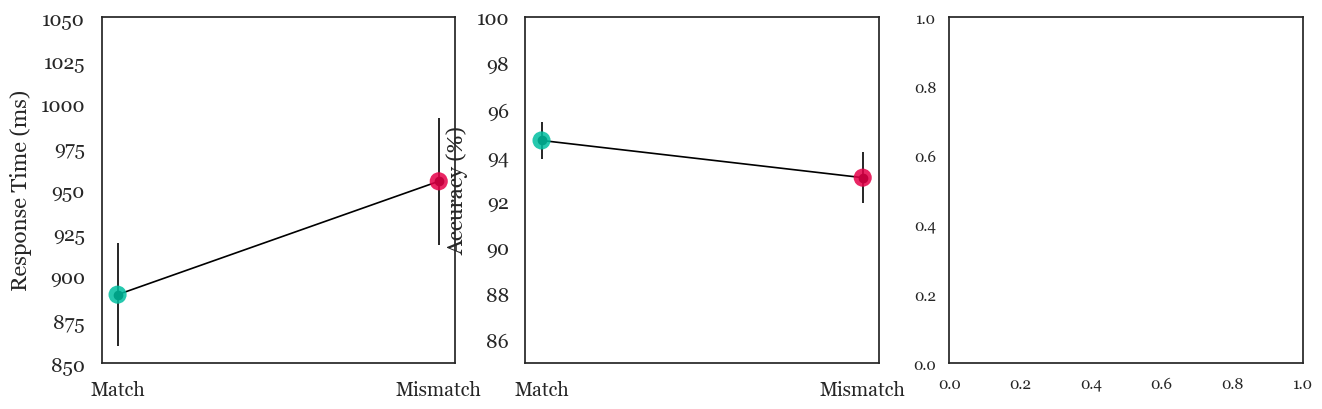

In [264]:
# Re-import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import t

# Set plot style (clean, white background, no grid)
sns.set(style="white", rc={"axes.grid": False})
plt.rcParams['font.family'] = 'Georgia'

# === SUMMARY STATISTICS (±1 SEM ~67% CI) ===
summary_df = df_task_questionnaire_subject.groupby('isMatch')['mean_rt_img'].agg(
    mean_rt='mean',
    min_rt=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_rt=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

summary_df_pc = df_task_questionnaire_subject.groupby('isMatch')['percentage_correct'].agg(
    mean_pc='mean',
    min_pc=lambda x: x.mean() - x.std()/np.sqrt(x.count()),
    max_pc=lambda x: x.mean() + x.std()/np.sqrt(x.count())
).reset_index()

# === REORDER TO MATCH -> MISMATCH ===
summary_df = summary_df.sort_values(by='isMatch', ascending=False).reset_index(drop=True)
summary_df_pc = summary_df_pc.sort_values(by='isMatch', ascending=False).reset_index(drop=True)

# Labels and colors
match_labels = ['Match', 'Mismatch']
custom_palette = {
    'y': "#00bfa0",  # Match
    'n': "#e60049"   # Mismatch
}
color_map = {'Mismatch': "#e60049", 'Match': "#00bfa0"}
x_vals = [0, 1]

# === PLOTTING DIMENSIONS ===
fig_width = 5
fig_height = 4.5
fig, axes = plt.subplots(1, 3, figsize=(fig_width * 3.1, fig_height), sharey=False)

# === REACTION TIME PLOT ===
axes[0].plot(x_vals, summary_df['mean_rt'], color='black', marker='o', markersize=6, linewidth=1.2)
axes[0].errorbar(
    x=x_vals,
    y=summary_df['mean_rt'],
    yerr=[summary_df['mean_rt'] - summary_df['min_rt'], summary_df['max_rt'] - summary_df['mean_rt']],
    fmt='none',
    capsize=0,
    color='black',
    elinewidth=1.2
)
for i, val in enumerate(summary_df['mean_rt']):
    condition_key = ['y', 'n'][i]  # Match = 'y', Mismatch = 'n'
    axes[0].scatter(x_vals[i], val, color=custom_palette[condition_key], s=170, zorder=3, alpha=0.85, edgecolors='none')

axes[0].set_xticks(x_vals)
axes[0].set_xticklabels(match_labels)
axes[0].set_ylabel('Response Time (ms)', fontsize=16, labelpad=6)
axes[0].set_ylim([850, 1050])
axes[0].tick_params(axis='both', labelsize=14, pad=6)

# === ACCURACY PLOT ===
axes[1].plot(x_vals, summary_df_pc['mean_pc'], color='black', marker='o', markersize=6, linewidth=1.2)
axes[1].errorbar(
    x=x_vals,
    y=summary_df_pc['mean_pc'],
    yerr=[summary_df_pc['mean_pc'] - summary_df_pc['min_pc'], summary_df_pc['max_pc'] - summary_df_pc['mean_pc']],
    fmt='none',
    capsize=0,
    color='black',
    elinewidth=1.2
)
for i, val in enumerate(summary_df_pc['mean_pc']):
    condition_key = ['y', 'n'][i]  # Match = 'y', Mismatch = 'n'
    axes[1].scatter(x_vals[i], val, color=custom_palette[condition_key], s=170, zorder=3, alpha=0.85, edgecolors='none')

axes[1].set_xticks(x_vals)
axes[1].set_xticklabels(match_labels)
axes[1].set_ylabel('Accuracy (%)', fontsize=16, labelpad=6)
axes[1].set_ylim([85, 100])
axes[1].tick_params(axis='both', labelsize=14, pad=6)

# === VVIQ PLOT (THIRD PLOT) ===
# Replace values for isMatch
df = df_task_questionnaire.copy()
df['isMatch'] = df['isMatch'].replace({'n': 'Mismatch', 'y': 'Match'})

# Binned Means with Error Bars
df['vviq_bin'] = pd.qcut(df['vviq_sum'], q=3)

summary = df.groupby(['vviq_bin', 'isMatch']).agg(
    mean_rt=('rt_img', 'mean'),
    count=('rt_img', 'count'),
    std=('rt_img', 'std')
).reset_index()

# Compute 95% CI
summary['se'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['se'] * t.ppf(0.975, df=summary['count'] - 1)
summary['x'] = summary['vviq_bin'].apply(lambda b: b.mid)

# Create scatter plot with error bars for Match
match_data = summary[summary['isMatch'] == 'Match']
axes[2].errorbar(
    x=match_data['x'],
    y=match_data['mean_rt'],
    yerr=match_data['ci95'],
    fmt='o', 
    markersize=8,
    color=color_map['Match'],
    ecolor='black',
    elinewidth=1.2,
    capsize=0,
    label='Match'
)

# Create scatter plot with error bars for Mismatch
mismatch_data = summary[summary['isMatch'] == 'Mismatch']
axes[2].errorbar(
    x=mismatch_data['x'],
    y=mismatch_data['mean_rt'],
    yerr=mismatch_data['ci95'],
    fmt='o', 
    markersize=8,
    color=color_map['Mismatch'],
    ecolor='black',
    elinewidth=1.2,
    capsize=0,
    label='Mismatch'
)

# Add regression lines
for condition, color in color_map.items():
    condition_data = df[df['isMatch'] == condition]
    x = condition_data['vviq_sum']
    y = condition_data['rt_img']
    
    # Calculate regression line
    m, b = np.polyfit(x, y, 1)
    x_range = np.linspace(x.min(), x.max(), 100)
    y_pred = m * x_range + b
    
    # Plot regression line
    axes[2].plot(x_range, y_pred, color=color, linewidth=2)

# Style the third plot
axes[2].set_ylim(700, 1200)
axes[2].set_xlabel("VVIQ Scores", fontsize=15)
axes[2].set_ylabel("Reaction Time (ms)", fontsize=16, labelpad=6)
axes[2].tick_params(axis='both', labelsize=14, pad=6)
axes[2].legend(title="", fontsize=12)

# Final touches
sns.despine()
plt.tight_layout()
plt.savefig('match_effect_three_panel.png', dpi=300)
plt.show()

**Participants with higher visual imagery vividness (VVIQ) tend to show a stronger match effect — that is, higher VVIQ → greater difference between conditions (e.g., faster RTs or higher accuracy for match vs mismatch).**

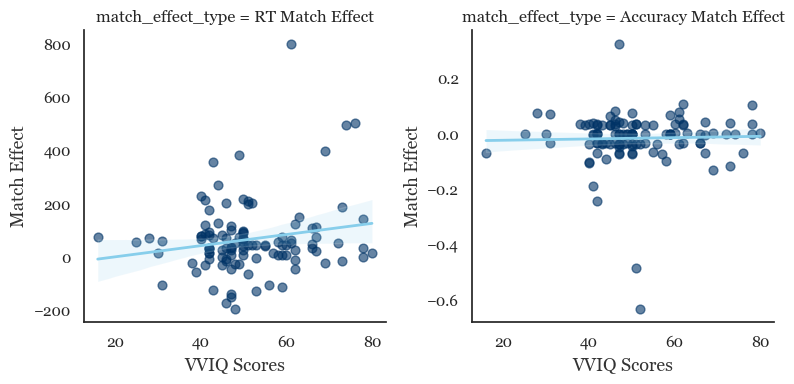

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set clean style and font
sns.set(style="white")
plt.rcParams["font.family"] = "Georgia"

# Melt the dataframe to long format for faceting
melted_df = result_df.melt(
    id_vars=['subject', 'vviq_sum'],
    value_vars=['match_effect_rt', 'match_effect_accuracy'],
    var_name='match_effect_type',
    value_name='match_effect_value'
)

# Optional: cleaner labels for facets
label_map = {
    'match_effect_rt': 'RT Match Effect',
    'match_effect_accuracy': 'Accuracy Match Effect',
}
melted_df['match_effect_type'] = melted_df['match_effect_type'].map(label_map)

# Create FacetGrid
g = sns.FacetGrid(
    melted_df, col="match_effect_type", sharey=False,
    height=4, aspect=1, margin_titles=True
)

# Map regplot to each facet
g.map(
    sns.regplot, "vviq_sum", "match_effect_value",
    scatter=True, ci=95,
    scatter_kws={'s': 40, 'alpha': 0.6, 'color': '#003366'},
    line_kws={'color': '#87ceeb', 'linewidth': 2}
)

# Customize each subplot
for ax in g.axes.flat:
    ax.set_xlabel("VVIQ Scores", fontsize=13, color="#333333")
    ax.set_ylabel("Match Effect", fontsize=13, color="#333333")
    ax.tick_params(axis='both', which='major', labelsize=11, color='#333333')
    sns.despine(ax=ax)

# Tight layout and save
plt.tight_layout()
plt.savefig('facet_match_effects_vviq_georgia.png', dpi=300)
plt.show()


In [266]:
df_task_questionnaire

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general,index,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std
0,0zhjr0hs,9,29,"<div style=""font-size: 30px;"">There was paint ...","<img src=""Images/paintstroke.jpg""/>",experimental,y,1018,625,1,list_2,65041,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
1,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,y,844,782,1,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
2,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,n,754,690,1,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369
3,0zhjr0hs,27,48,"<div style=""font-size:

In [431]:
pd.reset_option('display.max_rows')

In [432]:
result_df

,subject,vviq_sum,irq_visual_mean,irq_verbal_mean,osviq_object_mean,osviq_verbal_mean,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z,match_effect_rt,match_effect_accuracy
0,09g1jpab,30.0,2.9,1.250000,2.666667,4.266667,-1.805460,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,15.883333,0.000000
1,0a1mu6ef,46.0,3.3,3.416667,2.933333,3.066667,-0.458363,-0.636375,-0.588235,0.273964,-1.455220,-0.737756,-0.680297,-0.102951,-17.758621,-0.034483
2,0q5f5cfx,62.0,4.3,3.083333,3.666667,2.000000,0.888734,0.713380,-1.042781,-0.718224,0.224276,0.296175,1.971038,-1.917759,-44.428571,0.035714
3,0zhjr0hs,31.0,2.9,4.833333,2.933333,3.000000,-1.721266,-1.176277,1.343583,2.258340,0.224276,-0.737756,0.486290,-0.216377,-107.352941,0.072829
4,1ggpsz6b,45.0,3.9,4.416667,3.866667,3.800000,-0.542556,0.173478,0.775401,-0.552859,0.560175,0.578156,1.228664,1.144729,-0.509259,-0.038360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,zg96qrwn,47.0,3.4,4.166667,3.266667,2.000000,-0.374169,-0.501400,0.434492,0.935423,-0.111623,-0.267787,0.062077,-1.917759,36.608696,0.000000
107,zlnw3q3w,76.0,4.8,4.916667,4.733333,4.000000,2.067443,1.388257,1.457219,1.100788,-0.783422,1.800074,0.274183,1.485005,501.448276,-0.068966
108,zplbf8cc,38.0,2.5,2.833333,2.266667,2.733333,-1.131911,-1.716179,-1.383690,-1.214318,0.056326,-1.677693,-0.468190,-0.670078,-21.689655,0.034483
109,zqxespyp,61.0,4.3,3.750000,3.000000,2.866667,0.804540,0.713380,-0.133690,0.935423,0.560175,-0.643762,0.804450,-0.443228,801.496552,0.052874


In [433]:
result_df.to_csv('zv_task_questionnaire_replication_pivot.csv', index=False)

In [434]:
df_task_questionnaire.to_csv('zv_task_questionnaire_replication.csv', index=False)

In [ ]:
# df_old = pd.read_csv('zv_task_questionnaire_replication_old.csv')

In [702]:
# df_responses_correlation = df_task_questionnaire[['subject', 'irq-visual-mean', 'irq-verbal-mean',
#                                   'irq-ortho-mean', 'irq-manipulation-mean',
#                                   'osviq-spatial-mean', 'osviq-object-mean',
#                                   'osviq-verbal-mean', 'vviq-sum']]

In [682]:
df_responses_correlation = df_responses_correlation.drop_duplicates('subject')

In [683]:
df_corr = df_responses_correlation.corr()
df_corr

,irq-visual-mean,irq-verbal-mean,irq-ortho-mean,irq-manipulation-mean,osviq-spatial-mean,osviq-object-mean,osviq-verbal-mean,vviq-sum
irq-visual-mean,1.000000,0.460071,0.491910,0.420314,0.076398,0.840214,-0.027601,0.546399
irq-verbal-mean,0.460071,1.000000,0.563822,0.331120,-0.055356,0.480784,0.088362,0.157296
irq-ortho-mean,0.491910,0.563822,1.000000,0.202367,-0.085546,0.535426,0.133514,0.206469
irq-manipulation-mean,0.420314,0.331120,0.202367,1.000000,0.467913,0.374706,-0.027122,0.310184
osviq-spatial-mean,0.076398,-0.055356,-0.085546,0.467913,1.000000,0.076133,-0.170846,0.192507
osviq-object-mean,0.840214,0.480784,0.535426,0.374706,0.076133,1.000000,0.135687,0.490130
osviq-verbal-mean,-0.027601,0.088362,0.133514,-0.027122,-0.170846,0.135687,1.000000,-0.021630
vviq-sum,0.546399,0.157296,0.206469,0.310184,0.192507,0.490130,-0.021630,1.000000


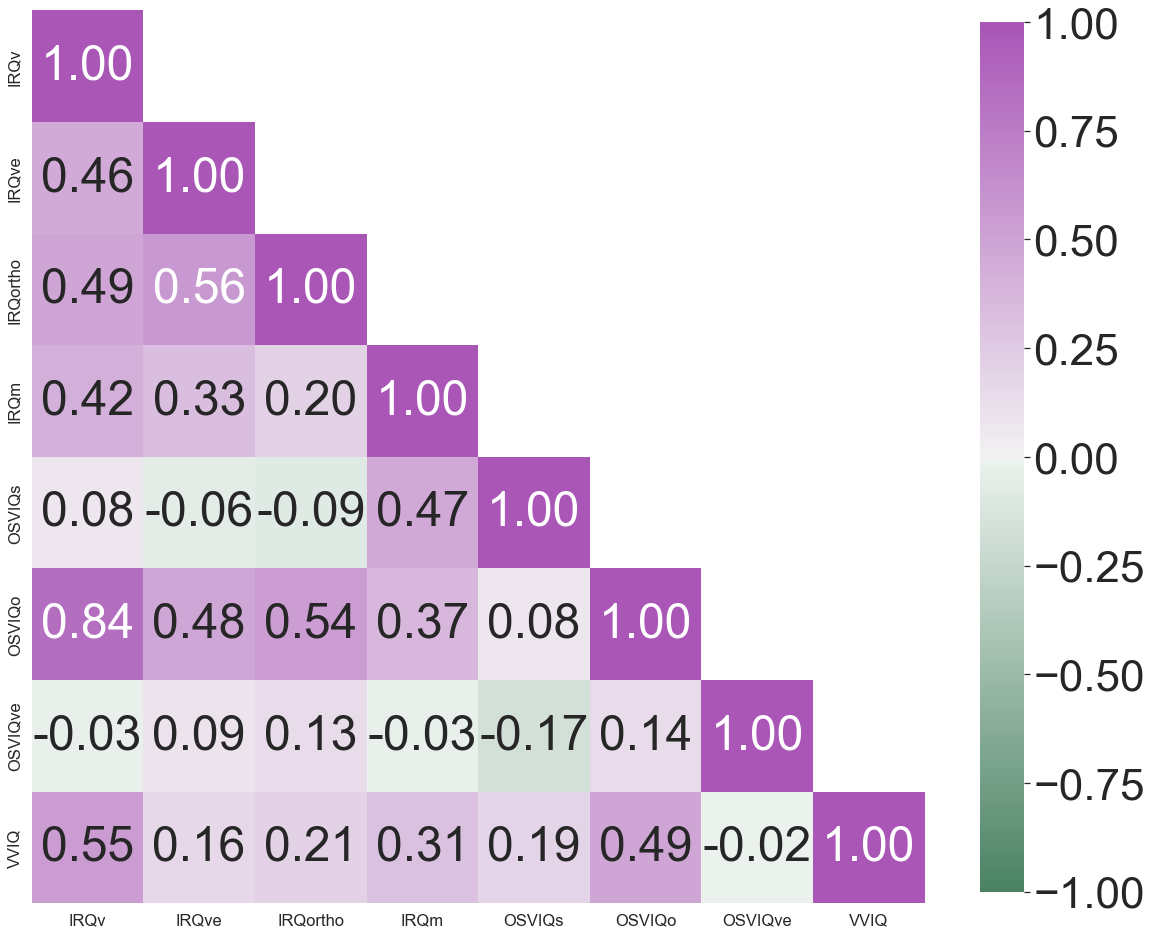

In [684]:
# plotting correlation heatmap


fig, ax = plt.subplots(figsize=(20, 20))
# plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.tick_params(axis='both', which='major', labelsize=20, labelbottom = False, bottom=False, top = False, labeltop=True)

#ax.set_ylim([0,7])

sb.set(font_scale=4, rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# mask = np.triu(np.ones_like(df_responses_correlation.corr()))
# corr = df_responses_correlation.iloc[1:,:-1].copy()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
np.fill_diagonal(mask, False)


# mask = mask[1:, :-1]
# corr = df_corr.iloc[1:,:-1].copy()

cmap = sb.diverging_palette(145, 300, s=60, as_cmap=True)
x_axis_labels = ['IRQv','IRQve','IRQortho', 'IRQm', 'OSVIQs', 'OSVIQo','OSVIQve', 'VVIQ'] # labels for x-axis
y_axis_labels = ['IRQv','IRQve','IRQortho', 'IRQm','OSVIQs', 'OSVIQo','OSVIQve', 'VVIQ']

dataplot = sb.heatmap(df_corr, cmap=cmap,
                      vmin=-1, vmax=1, annot=True, fmt=".2f",
                      mask=mask, square=True, cbar_kws={"shrink": 0.8}, xticklabels=x_axis_labels,
                      yticklabels=y_axis_labels)

# xticks
# yticks = [i.upper() for i in corr.index]
# xticks = [i.upper() for i in corr.columns]
# plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
# plt.xticks(plt.xticks()[0], labels=xticks)

# title = 'Correlations Between Questionnaire Dimensions'
# plt.title(title, loc='left', fontsize=35)

# dataplot = sb.heatmap(df_responses_correlation.corr(), annot=True, mask=mask)


# dataplot.sb.color_palette("viridis", as_cmap=True)

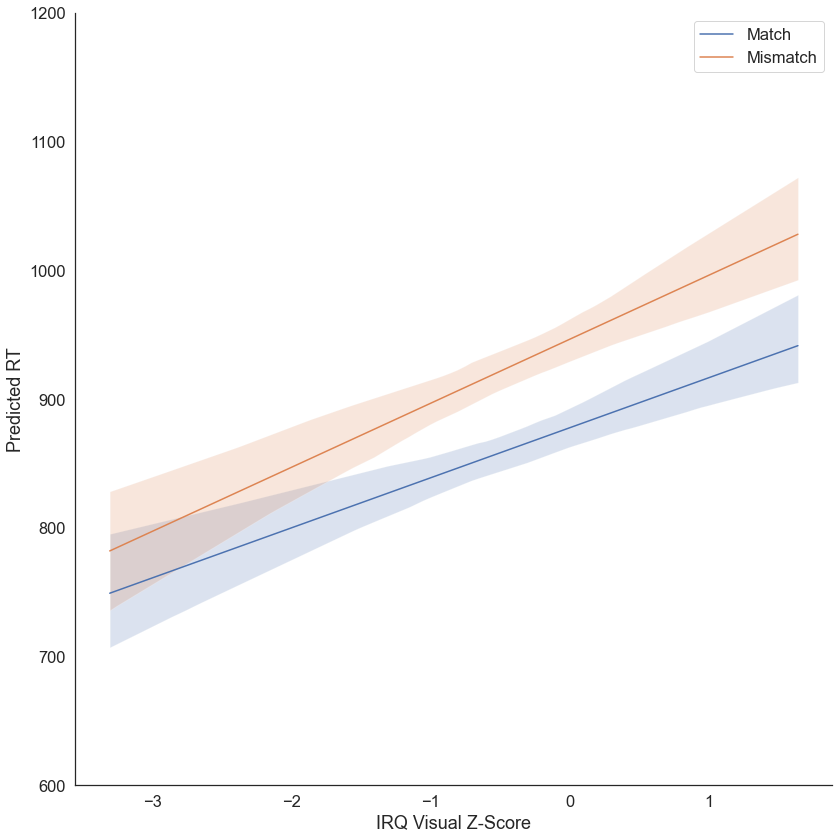

In [487]:
# Prepare data for predictions
vviq_z_range = np.linspace(df_task_questionnaire["irq_visual_z"].min(), df_task_questionnaire["irq_visual_z"].max(), 100)
isMatch_categories = ['Match', 'Mismatch']
pred_data = pd.DataFrame({'irq_visual_z': np.repeat(vviq_z_range, len(isMatch_categories)),
                          'isMatch': np.tile(isMatch_categories, len(vviq_z_range))})
pred_data['isMatch'] = pd.Categorical(pred_data['isMatch'], categories=isMatch_categories)

# Bootstrap approach to generate confidence intervals
n_bootstraps = 100
predictions = []

# Bootstrapping loop
for _ in range(n_bootstraps):
    # Sample with replacement from the original data
    df_sample = df_task_questionnaire.sample(n=len(df_task_questionnaire), replace=True)
    # Fit the model to the bootstrap sample
    model_sample = smf.mixedlm("rt_img ~ isMatch*irq_visual_z", df_sample, 
                               groups=df_sample["subject"],
                               re_formula="1").fit()
    # Predict using the model fitted to the bootstrap sample
    pred_sample = model_sample.predict(pred_data)
    predictions.append(pred_sample)

# Convert the list of predictions to a DataFrame
predictions_df = pd.DataFrame(predictions).T

# Calculate the mean and 95% CI for predictions
pred_data['mean_predicted_rt_img'] = predictions_df.mean(axis=1)
pred_data['ci_lower'] = predictions_df.quantile(0.025, axis=1)
pred_data['ci_upper'] = predictions_df.quantile(0.975, axis=1)



# Plotting with confidence intervals
plt.figure(figsize=(12, 12))
for category in isMatch_categories:
    subset = pred_data[pred_data['isMatch'] == category]
    plt.fill_between(subset['irq_visual_z'], subset['ci_lower'], subset['ci_upper'], alpha=0.2)
    sns.lineplot(data=subset, x='irq_visual_z', y='mean_predicted_rt_img', label=category)

plt.xlabel('IRQ Visual Z-Score')
plt.ylabel('Predicted RT')
plt.ylim(600, 1200)
sns.despine()
plt.tight_layout()
plt.show()

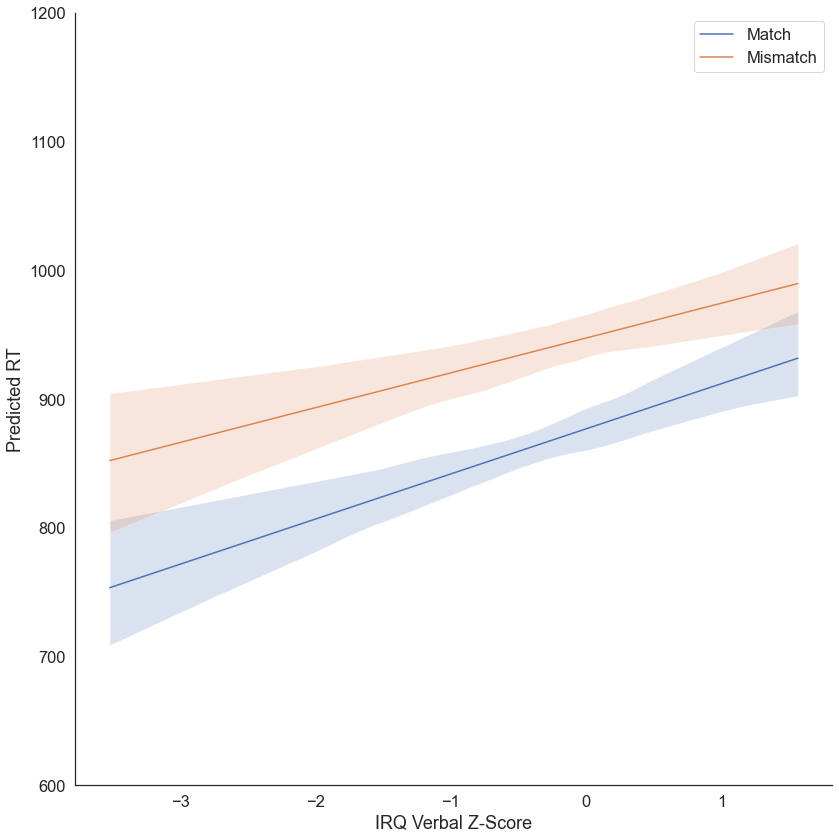

In [488]:
# Prepare data for predictions
vviq_z_range = np.linspace(df_task_questionnaire["irq_verbal_z"].min(), df_task_questionnaire["irq_verbal_z"].max(), 100)
isMatch_categories = ['Match', 'Mismatch']
pred_data = pd.DataFrame({'irq_verbal_z': np.repeat(vviq_z_range, len(isMatch_categories)),
                          'isMatch': np.tile(isMatch_categories, len(vviq_z_range))})
pred_data['isMatch'] = pd.Categorical(pred_data['isMatch'], categories=isMatch_categories)

# Bootstrap approach to generate confidence intervals
n_bootstraps = 100
predictions = []

# Bootstrapping loop
for _ in range(n_bootstraps):
    # Sample with replacement from the original data
    df_sample = df_task_questionnaire.sample(n=len(df_task_questionnaire), replace=True)
    # Fit the model to the bootstrap sample
    model_sample = smf.mixedlm("rt_img ~ isMatch*irq_verbal_z", df_sample, 
                               groups=df_sample["subject"],
                               re_formula="1").fit()
    # Predict using the model fitted to the bootstrap sample
    pred_sample = model_sample.predict(pred_data)
    predictions.append(pred_sample)

# Convert the list of predictions to a DataFrame
predictions_df = pd.DataFrame(predictions).T

# Calculate the mean and 95% CI for predictions
pred_data['mean_predicted_rt_img'] = predictions_df.mean(axis=1)
pred_data['ci_lower'] = predictions_df.quantile(0.025, axis=1)
pred_data['ci_upper'] = predictions_df.quantile(0.975, axis=1)



# Plotting with confidence intervals
plt.figure(figsize=(12, 12))
for category in isMatch_categories:
    subset = pred_data[pred_data['isMatch'] == category]
    plt.fill_between(subset['irq_verbal_z'], subset['ci_lower'], subset['ci_upper'], alpha=0.2)
    sns.lineplot(data=subset, x='irq_verbal_z', y='mean_predicted_rt_img', label=category)

plt.xlabel('IRQ Verbal Z-Score')
plt.ylabel('Predicted RT')
plt.ylim(600, 1200)
sns.despine()
plt.tight_layout()
plt.show()

In [469]:
pred_data

,vviq_z,isMatch,predicted_rt_img
0,-2.982154,Match,808.777337
1,-2.982154,Mismatch,814.651546
2,-2.928237,Match,809.999846
3,-2.928237,Mismatch,817.033984
4,-2.874321,Match,811.222354
...,...,...,...
195,2.247791,Mismatch,1045.747991
196,2.301708,Match,928.583149
197,2.301708,Mismatch,1048.130429
198,2.355625,Match,929.805658


In [594]:
df_task_questionnaire

,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general,index_x,rt_sent_mean_x,rt_sent_std_x,rt_img_mean_x,rt_img_std_x,index_y,rt_sent_mean_y,rt_sent_std_y,rt_img_mean_y,rt_img_std_y,index,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std,irq-visual-mean,irq-verbal-mean,irq-ortho-mean,irq-manipulation-mean,osviq-spatial-mean,osviq-object-mean,osviq-verbal-mean,vviq-sum,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,Match,844,782,True,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,2.9,4.833333,4.714286,3.625,2.933333,2.933333,3.000000,31.0,-1.731727,-1.182630,1.350897,2.250457,0.227434,-0.735833,0.486439,-0.221178
1,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,Mismatch,754,690,True,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,2.9,4.833333,4.714286,3.625,2.933333,2.933333,3.000000,31.0,-1.731727,-1.18

In [595]:
df_task_questionnaire['trialIndex'] = df_task_questionnaire['trialIndex'].astype('category')
df_task_questionnaire['subject'] = df_task_questionnaire['subject'].astype('category')

# If `isMatch` is a string and you haven't encoded it yet, consider converting it to a categorical variable:
df_task_questionnaire['isMatch'] = df_task_questionnaire['isMatch'].astype('category')

In [620]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the full model with isMatch as a fixed effect
model_full = smf.mixedlm("rt_img ~ isMatch*vviq_z", df_task_questionnaire, 
                         groups=df_task_questionnaire["subject"],
                         re_formula="1")
result_full = model_full.fit()
print("Full Model (with isMatch):")
print(result_full.summary())

# Define the reduced model without isMatch as a fixed effect
model_reduced = smf.mixedlm("rt_img ~ isMatch", df_task_questionnaire, 
                            groups=df_task_questionnaire["subject"],
                            re_formula="1")
result_reduced = model_reduced.fit()
print("\nReduced Model (without isMatch):")
print(result_reduced.summary())

# # Compare the two models using a likelihood ratio test
# print("\nComparing Full Model with Reduced Model:")
# lr_test = result_full.compare_lr_test(result_reduced)
# print(f"Likelihood Ratio Statistic: {lr_test[0]}")
# print(f"p-value: {lr_test[1]}")
# print(f"Difference in Degree of Freedom: {lr_test[2]}")


Full Model (with isMatch):
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       rt_img     
No. Observations:       6165          Method:                   REML       
No. Groups:             115           Scale:                    224802.7856
Min. group size:        10            Log-Likelihood:           -46906.8723
Max. group size:        59            Converged:                Yes        
Mean group size:        53.6                                               
---------------------------------------------------------------------------
                             Coef.    Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------
Intercept                     873.886   32.715 26.712 0.000 809.766 938.006
isMatch[T.Mismatch]            67.376   12.089  5.574 0.000  43.683  91.069
vviq_z                         23.599   32.680  0.722 0.470 -40.453  87.650
isMa

In [621]:

# Log-Likelihoods
log_likelihood_full = -46906.8723
log_likelihood_reduced = -46917.0316

# Calculate the likelihood ratio (LR) test statistic
lr_statistic = -2 * (log_likelihood_reduced - log_likelihood_full)

# Degrees of freedom (number of extra parameters in the full model)
df = 1

# Calculate the p-value
p_value = chi2.sf(lr_statistic, df)

lr_statistic, p_value

(20.318599999998696, 6.556015813049558e-06)

In [599]:
print(result_reduced.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: rt_img     
No. Observations:  6165    Method:             REML       
No. Groups:        115     Scale:              226012.1199
Min. group size:   10      Log-Likelihood:     -46935.9382
Max. group size:   59      Converged:          Yes        
Mean group size:   53.6                                   
----------------------------------------------------------
            Coef.    Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    907.870   32.189 28.204 0.000 844.780 970.960
Group Var 114697.683   33.472                             



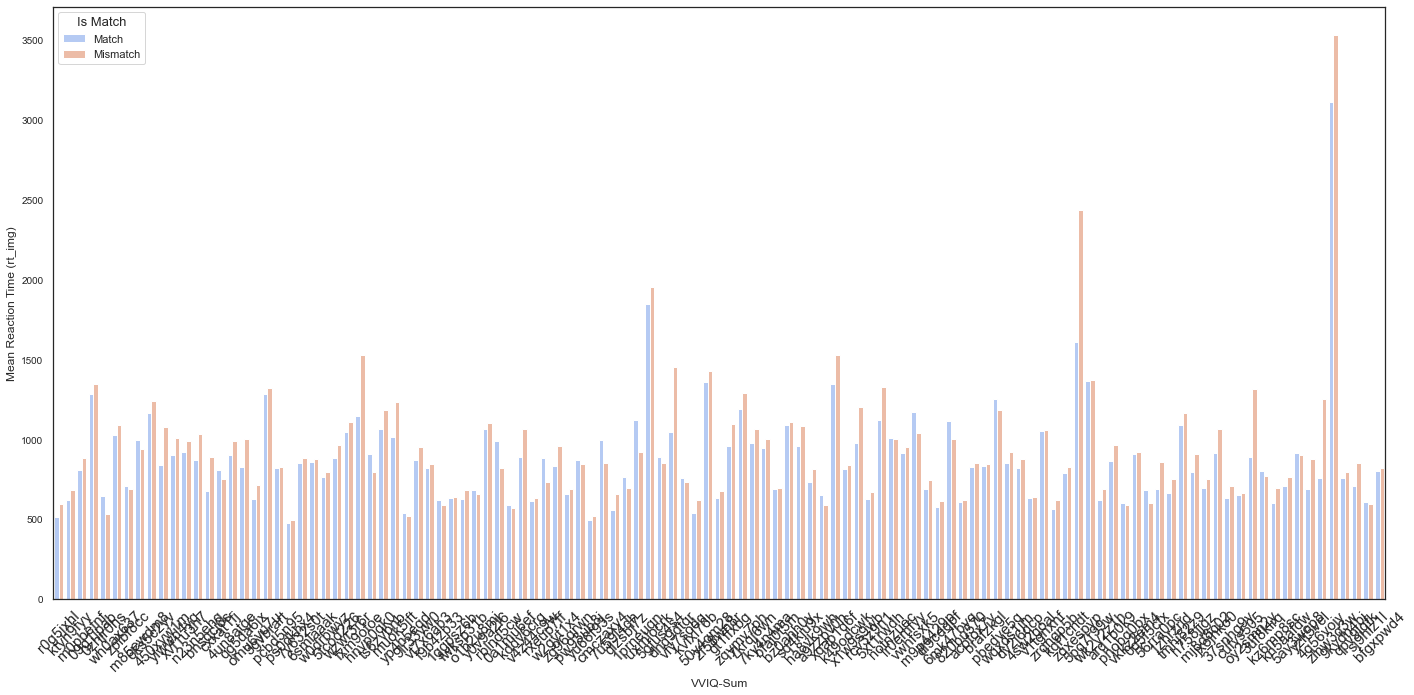

In [600]:
# First, calculate the mean vviq-sum for each subject
mean_vviq_sum = df_task_questionnaire.groupby('subject')['vviq-sum'].mean().reset_index()

# Sort the subjects based on their mean vviq-sum scores
mean_vviq_sum = mean_vviq_sum.sort_values(by='vviq-sum')

# Now, calculate the mean rt_img for each subject for each isMatch condition
mean_rt_img = df_task_questionnaire.groupby(['subject', 'isMatch'])['rt_img'].mean().reset_index()

# Merge the sorted vviq-sum scores with the mean rt_img data
mean_rt_img_sorted = pd.merge(mean_rt_img, mean_vviq_sum, on='subject', how='left')

# Use the sorted vviq-sum as the order for plotting
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.barplot(data=mean_rt_img_sorted, x='subject', y='rt_img', hue='isMatch', palette='coolwarm', order=mean_vviq_sum['subject'])

plt.title('')
plt.xlabel('VVIQ-Sum', fontsize=12)
plt.ylabel('Mean Reaction Time (rt_img)', fontsize=12)
plt.xticks(rotation=45, fontsize=15)  # Decrease size of x-axis labels
plt.yticks(fontsize=10)  # Decrease size of y-axis labels
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap

# Adjust the legend font size
plt.legend(title='Is Match', title_fontsize='13', fontsize='11')

plt.show()


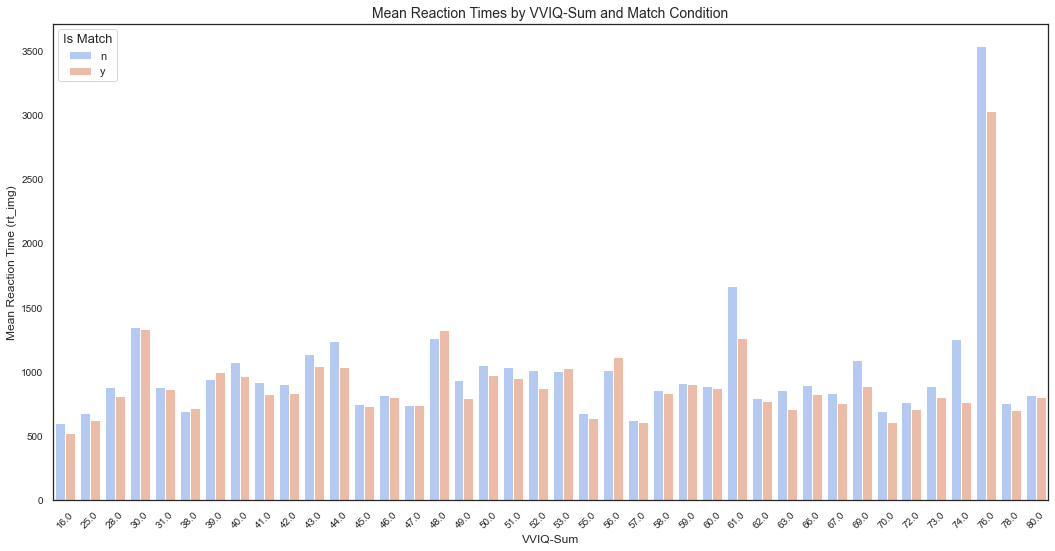

In [1231]:
# Ensure 'vviq-sum' is treated as numeric for sorting
df_task_questionnaire['vviq-sum'] = pd.to_numeric(df_task_questionnaire['vviq-sum'], errors='coerce')

# Calculate the mean rt_img for each vviq-sum score for each isMatch condition
mean_rt_img = df_task_questionnaire.groupby(['vviq-sum', 'isMatch'])['rt_img'].mean().reset_index()

# Sort by vviq-sum in ascending order to ensure the plot follows this order
mean_rt_img = mean_rt_img.sort_values('vviq-sum')

# Now, plot using seaborn's barplot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
barplot = sns.barplot(data=mean_rt_img, x='vviq-sum', y='rt_img', hue='isMatch', palette='coolwarm')

plt.title('Mean Reaction Times by VVIQ-Sum and Match Condition', fontsize=14)
plt.xlabel('VVIQ-Sum', fontsize=12)
plt.ylabel('Mean Reaction Time (rt_img)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Decrease size of x-axis labels
plt.yticks(fontsize=10)  # Decrease size of y-axis labels
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap



# Adjust the legend font size
plt.legend(title='Is Match', title_fontsize='13', fontsize='11')
plt.show()

In [602]:
mean_vviq_per_subject_isMatch = df_task_questionnaire.groupby(['subject', 'isMatch'])['vviq-sum'].mean().reset_index()

In [603]:
mean_irq_visual_per_subject_isMatch = df_task_questionnaire.groupby(['subject', 'isMatch'])['irq-visual-mean'].mean().reset_index()

In [604]:
mean_vviq_per_subject_isMatch_irq_visual 

,subject,isMatch,irq-visual-mean
0,09g1jpab,Match,2.9
1,09g1jpab,Mismatch,2.9
2,0a1mu6ef,Match,3.3
3,0a1mu6ef,Mismatch,3.3
4,0q5f5cfx,Match,4.3
...,...,...,...
219,zqxespyp,Mismatch,4.3
220,zqymv7ph,Match,4.6
221,zqymv7ph,Mismatch,4.6
222,zrqngp5b,Match,2.8


In [605]:
df_task_questionnaire



,subject,trial_index,trialIndex,sentence,image,trialType,isMatch,rt_sent,rt_img,hit,list,time_elapsed,correct_response,response,duration_quest,prolific_id,osviq-spatial-1,osviq-verbal-1,osviq-spatial-2,osviq-verbal-2,osviq-spatial-3,osviq-object-1,osviq-spatial-4,osviq-verbal-3,osviq-verbal-4,osviq-spatial-5,osviq-object-2,osviq-object-3,osviq-object-4,osviq-spatial-6,osviq-object-5,osviq-verbal-5,osviq-spatial-7,osviq-object-6,osivq-catch-1,osviq-verbal-6,osviq-object-7,osviq-verbal-7,osviq-verbal-8,osviq-object-8,osviq-verbal-9,osviq-spatial-8,osviq-object-9,osviq-spatial-9,osviq-verbal-10,osviq-object-10,osviq-spatial-10,osviq-spatial-11,osviq-spatial-12,osviq-object-11,osviq-object-12,osviq-verbal-11,osviq-verbal-12,osivq-catch-2,osviq-verbal-13,osviq-spatial-13,osviq-verbal-14,osviq-object-13,osviq-verbal-15,osviq-spatial-14,osviq-object-14,osviq-spatial-15,osviq-object-15,vviq1,vviq2,vviq3,vviq4,vviq5,vviq6,vviq7,vviq8,vviq9,vviq10,vviq11,vviq12,vviq13,vviq14,vviq15,vviq16,irq-visual-1,irq-visual-2,irq-visual-3,irq-visual-4,irq-visual-5,irq-visual-6,irq-visual-7,irq-visual-8,irq-visual-9,irq-visual-10,irq-verbal-1,irq-verbal-2,irq-verbal-3,irq-verbal-4,irq-verbal-5,irq-verbal-6,irq-verbal-7,irq-verbal-8,irq-verbal-9,irq-verbal-10,irq-verbal-11,irq-verbal-12,irq-ortho-1,irq-ortho-2,irq-ortho-3,irq-ortho-4,irq-ortho-5,irq-ortho-6,irq-ortho-7,irq-manipulation-1,irq-manipulation-2,irq-manipulation-3,irq-manipulation-4,irq-manipulation-5,irq-manipulation-6,irq-manipulation-7,irq-manipulation-8,irq-catch-1,phenomenology,phenomenology_other,previous_participation,age,gender,gender_other,handedness,neurodivergent,vision,vision_other,native-language,education,feedback_task,strategy_cat,strategy-open,feedback-general,index_x,rt_sent_mean_x,rt_sent_std_x,rt_img_mean_x,rt_img_std_x,index_y,rt_sent_mean_y,rt_sent_std_y,rt_img_mean_y,rt_img_std_y,index,rt_sent_mean,rt_sent_std,rt_img_mean,rt_img_std,irq-visual-mean,irq-verbal-mean,irq-ortho-mean,irq-manipulation-mean,osviq-spatial-mean,osviq-object-mean,osviq-verbal-mean,vviq-sum,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z
0,0zhjr0hs,12,57,"<div style=""font-size: 30px;"">There was chicke...","<img src=""Images/chickenoven.jpg""/>",experimental,Match,844,782,True,list_2,67436,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,2.9,4.833333,4.714286,3.625,2.933333,2.933333,3.000000,31.0,-1.731727,-1.182630,1.350897,2.250457,0.227434,-0.735833,0.486439,-0.221178
1,0zhjr0hs,15,6,"<div style=""font-size: 30px;"">There was a book...","<img src=""Images/bookdown.jpg""/>",experimental,Mismatch,754,690,True,list_2,69640,y,y,627,66111585096bf9ae230a30fb,4,4,1,2,3,1,1,4,2,4,2,4,3,3,5,4,2,5,1,1,2,2,4,2,2,4,4,2,4,3,5.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2,NaN,2.0,21,1.0,NaN,1.0,4,1.0,NaN,1.0,2,"Different ways individuals think, whether in w...",2.0,"Taking a mental ""picture"" of the objects in th...",NaN,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,3,378.85,178.536501,595.766667,233.35369,2.9,4.833333,4.714286,3.625,2.933333,2.933333,3.000000,31.0,-1.731727,-1.18

In [194]:
print(mean_values_per_subject_isMatch)


      subject   isMatch  vviq-sum  irq-visual-mean  irq-verbal-mean  \
0    09g1jpab  Mismatch      30.0              2.9         1.250000   
1    09g1jpab     Match      30.0              2.9         1.250000   
2    0a1mu6ef  Mismatch      46.0              3.3         3.416667   
3    0a1mu6ef     Match      46.0              3.3         3.416667   
4    0q5f5cfx  Mismatch      62.0              4.3         3.083333   
5    0q5f5cfx     Match      62.0              4.3         3.083333   
6    0zhjr0hs  Mismatch      31.0              2.9         4.833333   
7    0zhjr0hs     Match      31.0              2.9         4.833333   
8    1ggpsz6b  Mismatch      45.0              3.9         4.416667   
9    1ggpsz6b     Match      45.0              3.9         4.416667   
10   1prneuqn  Mismatch      48.0              3.8         4.500000   
11   1prneuqn     Match      48.0              3.8         4.500000   
12   2f58wn8r  Mismatch      50.0              4.6         3.833333   
13   2

In [608]:
# Split the DataFrame based on isMatch levels
df_n = mean_values_per_subject_isMatch[mean_values_per_subject_isMatch['isMatch'] == 'n']
df_y = mean_values_per_subject_isMatch[mean_values_per_subject_isMatch['isMatch'] == 'y']

# Ensure the index is 'subject' for both to facilitate subtraction
df_n = df_n.set_index('subject')
df_y = df_y.set_index('subject')

# Calculate match_effect
match_effect = df_n['mean_rt_img'] - df_y['mean_rt_img']

# Convert match_effect Series to DataFrame and reset index
match_effect_df = match_effect.reset_index()
match_effect_df.columns = ['subject', 'match_effect']

# Merge match_effect with mean_vviq_sum from either df_n or df_y (since each subject has one vviq score, it doesn't matter)
# Dropping duplicate 'subject' entries from df_n for mean_vviq_sum
df_vviq_sum = df_n[['mean_vviq_sum']].reset_index().drop_duplicates()

# Final merge to include match_effect and mean_vviq_sum
final_df = pd.merge(match_effect_df, df_vviq_sum, on='subject', how='left')

# final_df now has 'subject', 'match_effect', and 'mean_vviq_sum' for each subject


In [609]:
pd.set_option('display.max_rows', None)
print(final_df)
pd.reset_option('display.max_rows')


Empty DataFrame
Columns: [match_effect, subject, mean_vviq_sum]
Index: []
